# Credit Risk Analysis for P2P lender

Source: https://www.kaggle.com/datasets/ranadeep/credit-risk-dataset/data

### The goal is the predict possible credit defaulters to help the bank take necessary next steps.


In [2]:
## Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [8]:
## Read data
df = pd.read_csv("loan.csv", low_memory = False)

In [9]:
df.head() ## Check first 5 rows of data

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,1077501,1296599,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1077430,1314167,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1077175,1313524,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,C5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1076863,1277178,10000.0,10000.0,10000.0,36 months,13.49,339.31,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1075358,1311748,3000.0,3000.0,3000.0,60 months,12.69,67.79,B,B5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
df.shape ## Check for dataframe dimension

(887379, 74)

In [11]:
df.id.nunique(), df.member_id.nunique() ## Check for number of unique records
## for ID and Member ID are unique identifiers and hence refpresent 887379 unique records

(887379, 887379)

In [12]:
df.issue_d.unique()
## Data on Loans issued between Jun 2007 and Jan 2015

array(['Dec-2011', 'Nov-2011', 'Oct-2011', 'Sep-2011', 'Aug-2011',
       'Jul-2011', 'Jun-2011', 'May-2011', 'Apr-2011', 'Mar-2011',
       'Feb-2011', 'Jan-2011', 'Dec-2010', 'Nov-2010', 'Oct-2010',
       'Sep-2010', 'Aug-2010', 'Jul-2010', 'Jun-2010', 'May-2010',
       'Apr-2010', 'Mar-2010', 'Feb-2010', 'Jan-2010', 'Dec-2009',
       'Nov-2009', 'Oct-2009', 'Sep-2009', 'Aug-2009', 'Jul-2009',
       'Jun-2009', 'May-2009', 'Apr-2009', 'Mar-2009', 'Feb-2009',
       'Jan-2009', 'Dec-2008', 'Nov-2008', 'Oct-2008', 'Sep-2008',
       'Aug-2008', 'Jul-2008', 'Jun-2008', 'May-2008', 'Apr-2008',
       'Mar-2008', 'Feb-2008', 'Jan-2008', 'Dec-2007', 'Nov-2007',
       'Oct-2007', 'Sep-2007', 'Aug-2007', 'Jul-2007', 'Jun-2007',
       'Dec-2013', 'Nov-2013', 'Oct-2013', 'Sep-2013', 'Aug-2013',
       'Jul-2013', 'Jun-2013', 'May-2013', 'Apr-2013', 'Mar-2013',
       'Feb-2013', 'Jan-2013', 'Dec-2012', 'Nov-2012', 'Oct-2012',
       'Sep-2012', 'Aug-2012', 'Jul-2012', 'Jun-2012', 'May-20

## EDA

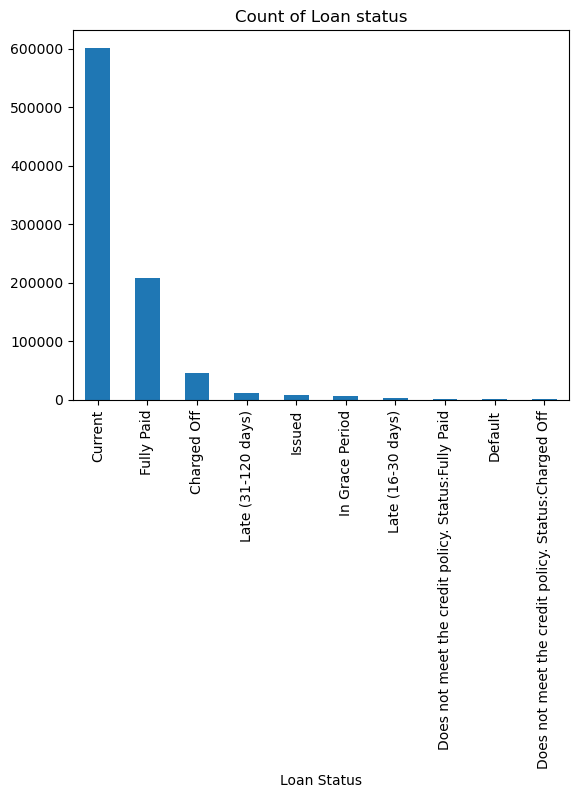

In [13]:
## Plot of target variable

df.loan_status.value_counts().plot(kind = "bar")
plt.title("Count of Loan status")
plt.xlabel("Loan Status")
plt.xticks(rotation = 90)
plt.show()

## Majority of the loans are current in status followed by fully paid and charged off, hints towards requirement
## of data balancing for certain methods

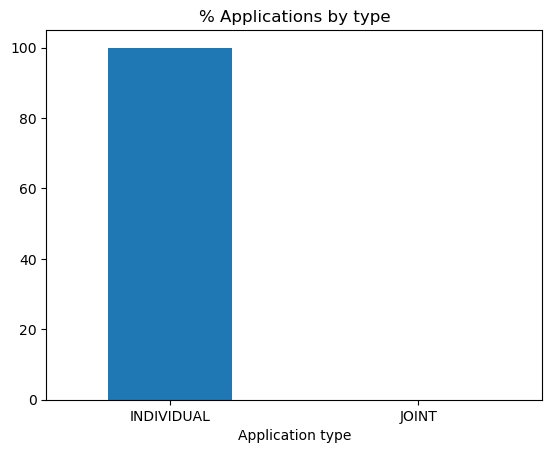

In [14]:
counts = df.application_type.value_counts(normalize = True)*100
counts.plot(kind = "bar")
plt.title("% Applications by type")
plt.xlabel("Application type")
plt.xticks(rotation = 0)
plt.show()

## Majority of the loans are Individual loans

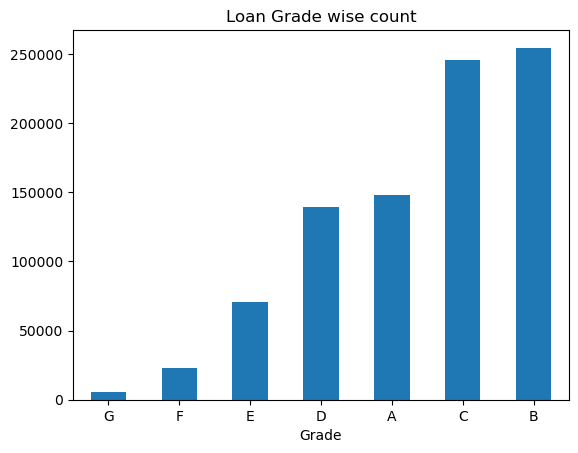

In [15]:
## Plot for loan Grade

df.grade.value_counts(dropna= False).sort_values().plot(kind = "bar")
plt.title("Loan Grade wise count")
plt.xlabel("Grade")
plt.xticks(rotation = 0)
plt.show()

## Majority of the loans are B and C graded.
## A is the highest rated grade to G being the lowest. Both capture the risk associated with the borrower

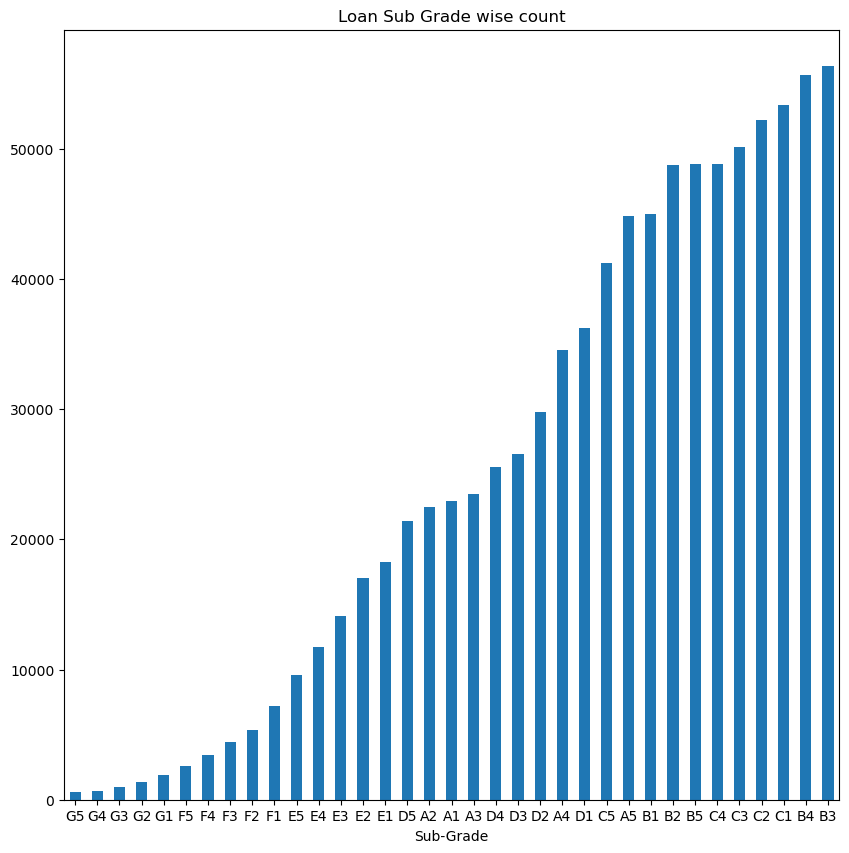

In [16]:
plt.figure(figsize = (10,10))
df.sub_grade.value_counts(dropna= False).sort_values().plot(kind = "bar")
plt.title("Loan Sub Grade wise count")
plt.xlabel("Sub-Grade")
plt.xticks(rotation = 0)
plt.show()
## Sub grade has 35 different categories 7 grades A-G and 5 subgrades per category. 
## We can observed a mix of subgrades specifically in the A,B,C and D categories.

In [17]:
df.acc_now_delinq.value_counts(dropna = False)

## Majority of the accounts do not have past delinquencies

acc_now_delinq
0.0     883236
1.0       3866
2.0        208
NaN         29
3.0         28
4.0          7
5.0          3
6.0          1
14.0         1
Name: count, dtype: int64

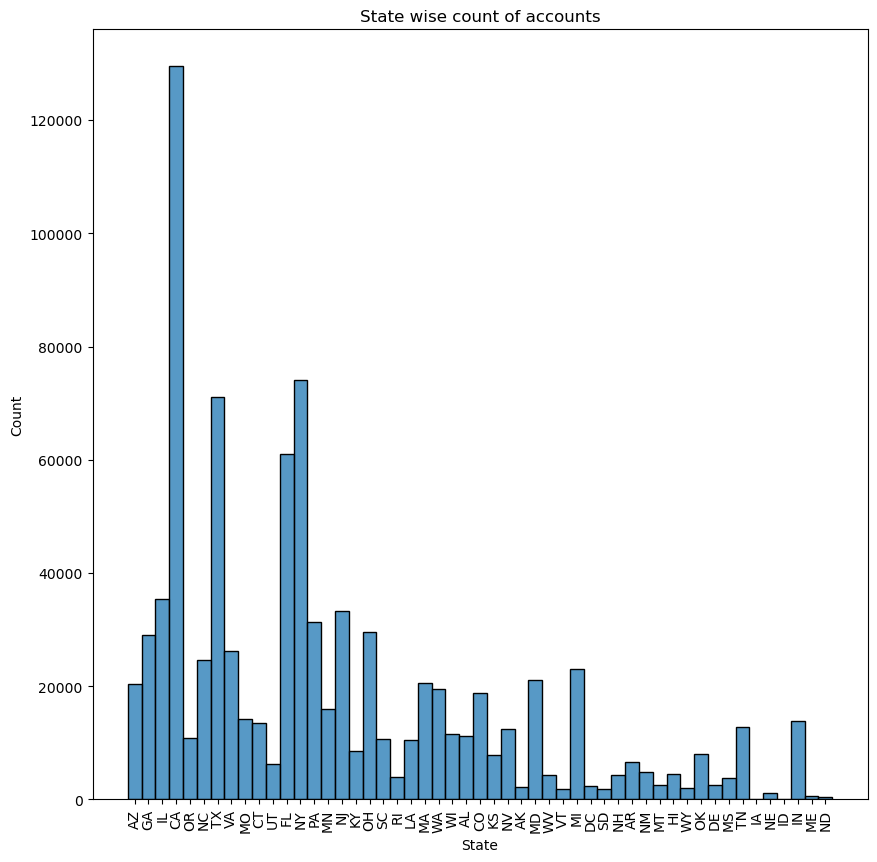

In [18]:
plt.figure(figsize = (10,10))
sns.histplot(data = df, x = "addr_state")
plt.title("State wise count of accounts")
plt.xlabel("State")
plt.xticks(rotation = 90)
plt.show()

## Majority of the borrowers are from California, followed by New York, Texas and Florida

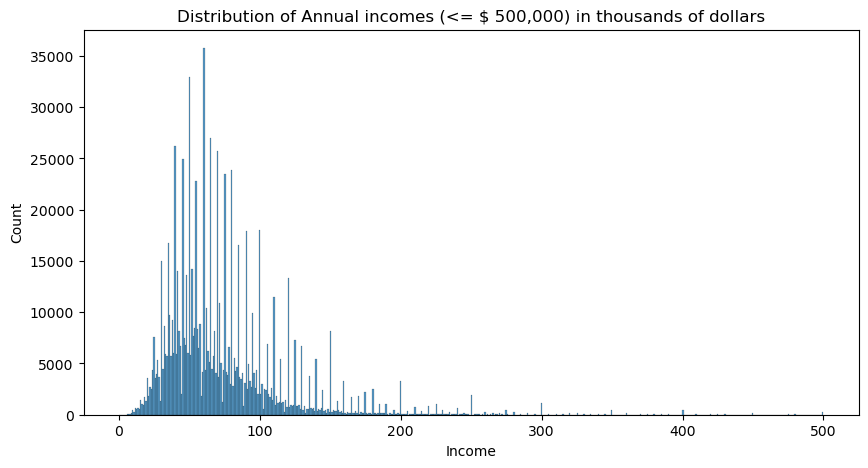

In [19]:
rev = df[df.annual_inc<=500000]
plt.figure(figsize = (10,5))
sns.histplot(data = rev, x = rev["annual_inc"]/1000)
plt.title("Distribution of Annual incomes (<= $ 500,000) in thousands of dollars")
plt.xlabel("Income")
plt.xticks(rotation = 0)
plt.show()

## Majority of the borrowers fall within the 0-100K range with the median close to 50K

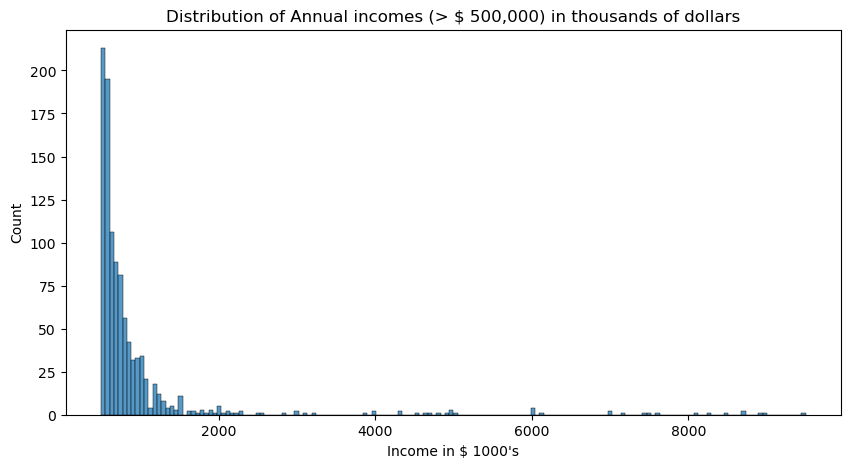

In [20]:
rev = df[df.annual_inc>500000]
plt.figure(figsize = (10,5))
sns.histplot(data = rev, x = rev["annual_inc"]/1000)
plt.title("Distribution of Annual incomes (> $ 500,000) in thousands of dollars")
plt.xlabel("Income in $ 1000's")
plt.xticks(rotation = 0)
plt.show()

## We also have borrowers with > 500K income and 9MM as the highest reported income

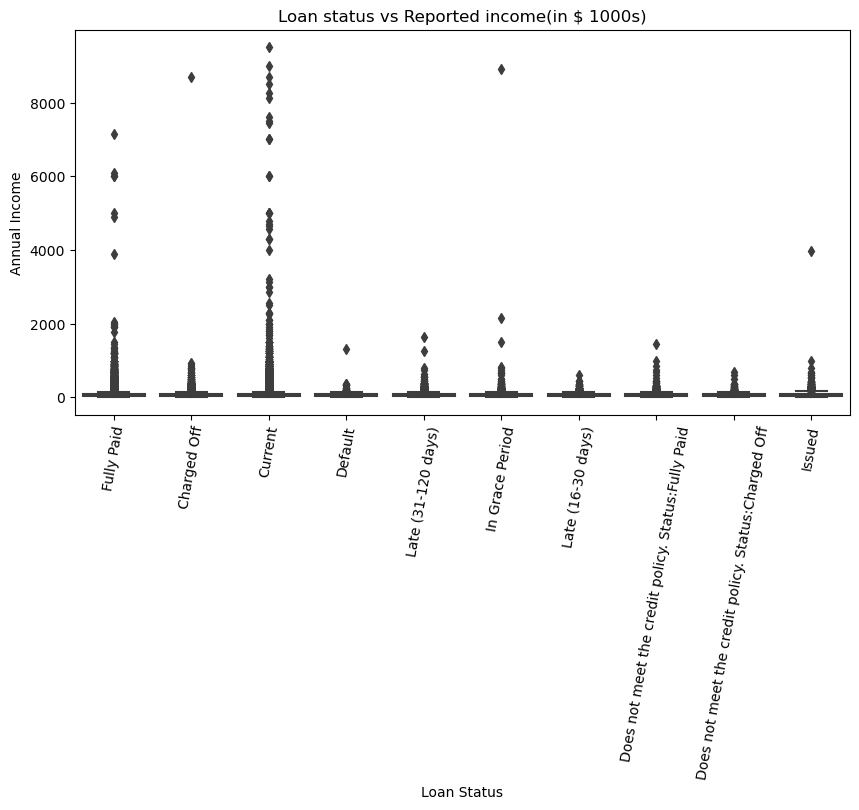

In [21]:
plt.figure(figsize = (10,5))
sns.boxplot(data = df, x = "loan_status", y = df["annual_inc"]/1000)
plt.xlabel("Loan Status")
plt.ylabel("Annual Income")
plt.title("Loan status vs Reported income(in $ 1000s)")
plt.xticks(rotation = 80)
plt.show()

## Current loans have many outlier incomes
## Because the incomes are self reported, the plot shows some odd patterns. There is one charged off loan with very high 
## income. This could be an outlier/flasely reported income. Same could be said about the 
## 8M income in the grace period category. 
## But the rest seem reasonable

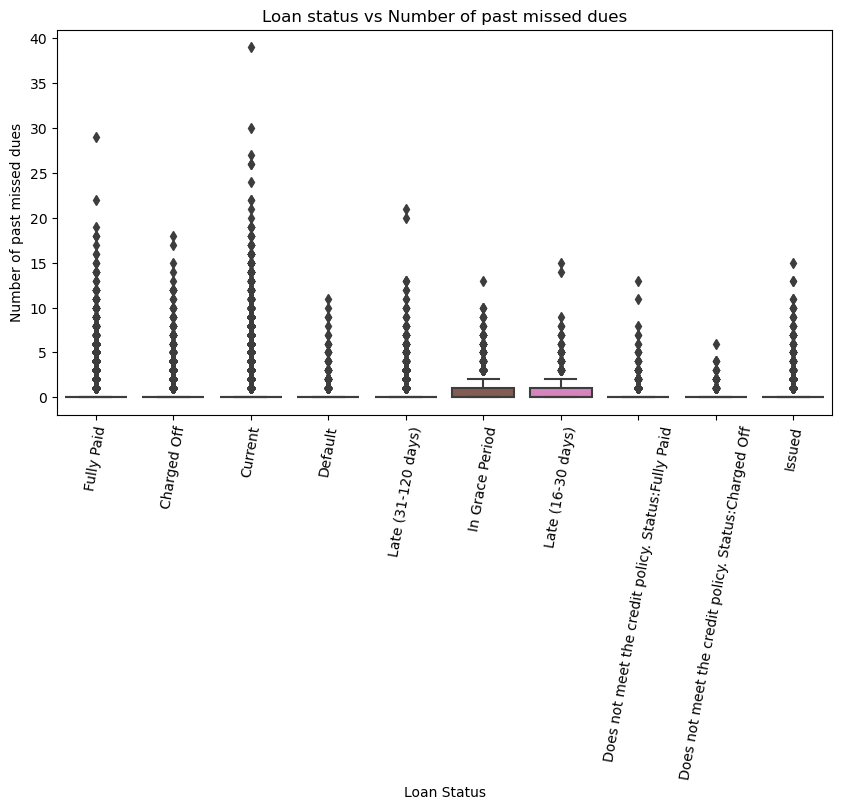

In [22]:
plt.figure(figsize = (10,5))
sns.boxplot(data = df, x = "loan_status", y = "delinq_2yrs")
plt.xlabel("Loan Status")
plt.ylabel("Number of past missed dues")
plt.title("Loan status vs Number of past missed dues")
plt.xticks(rotation = 80)
plt.show()

## No clear pattern or indication that past dues missed would lead to default

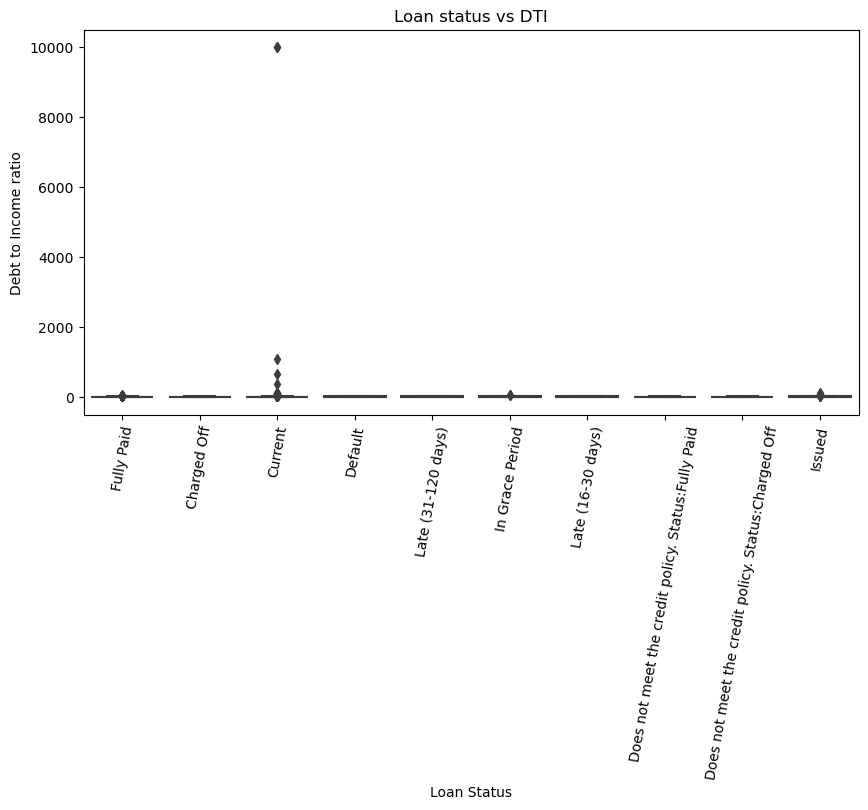

In [23]:
plt.figure(figsize = (10,5))
sns.boxplot(data = df, x = "loan_status", y = "dti")
plt.xlabel("Loan Status")
plt.ylabel("Debt to Income ratio")
plt.title("Loan status vs DTI")
plt.xticks(rotation = 80)
plt.show()

## Except a few extreme outlier, no bias observed in debt to income ratio of borrowers
## Handle extreme outliers

Maximum DTI for loan status Fully Paid = 57.14


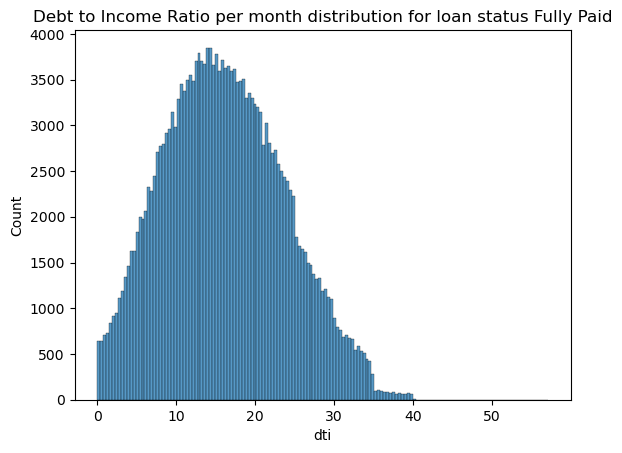

Maximum DTI for loan status Charged Off = 39.98


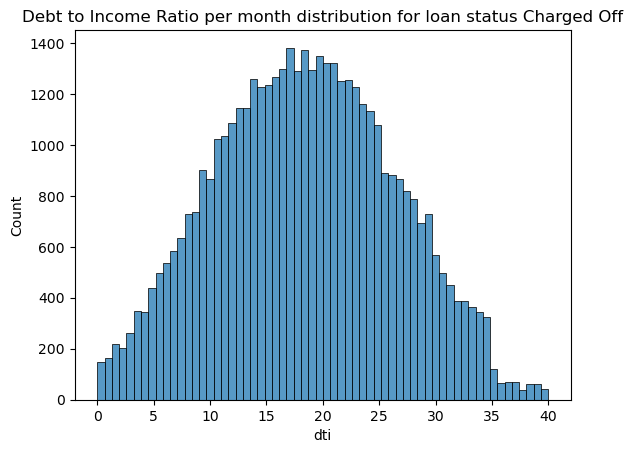

Maximum DTI for loan status Current = 9999.0


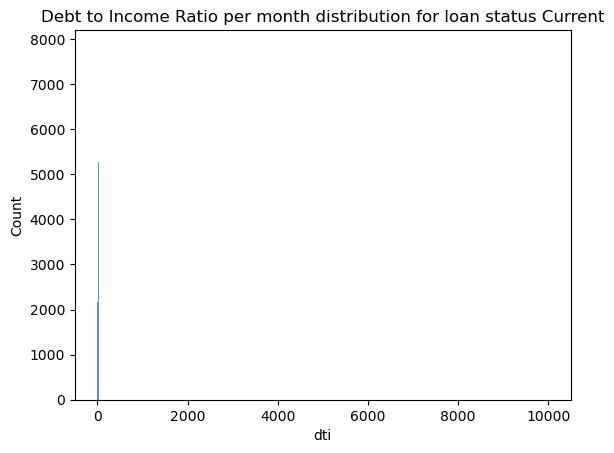

Maximum DTI for loan status Default = 39.72


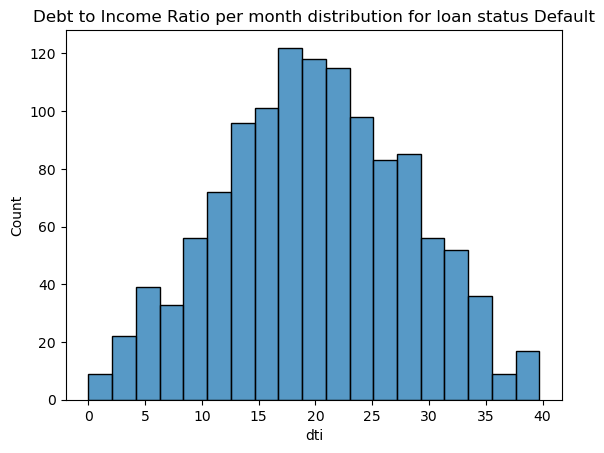

Maximum DTI for loan status Late (31-120 days) = 39.99


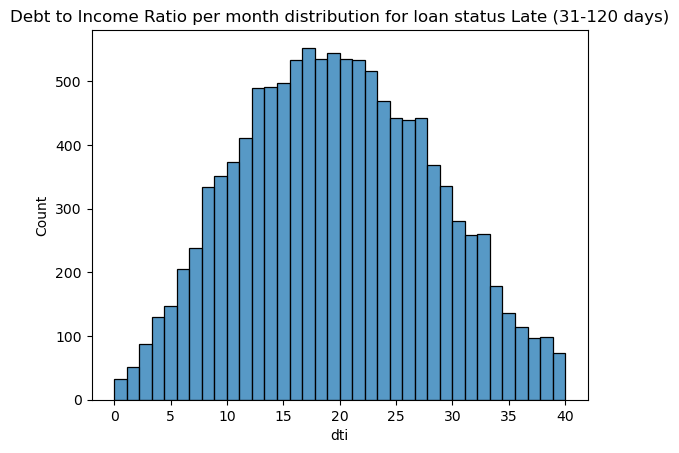

Maximum DTI for loan status In Grace Period = 59.26


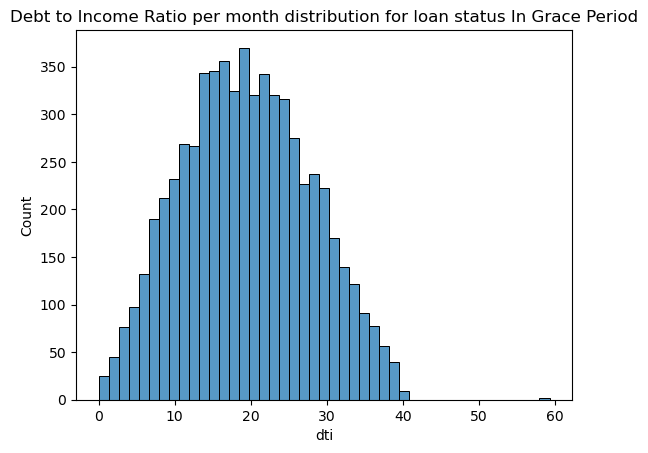

Maximum DTI for loan status Late (16-30 days) = 39.99


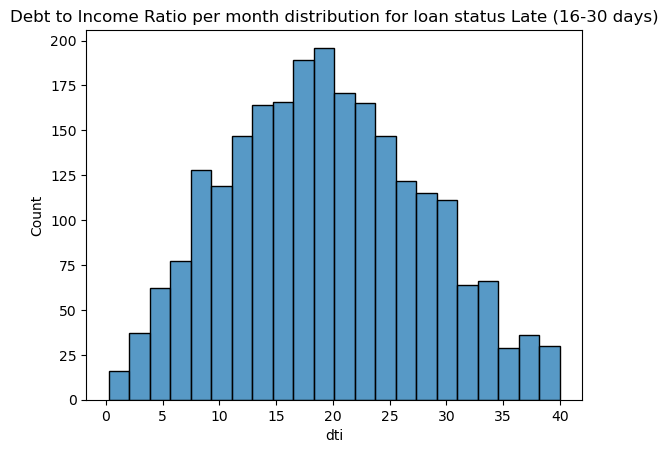

Maximum DTI for loan status Does not meet the credit policy. Status:Fully Paid = 29.95


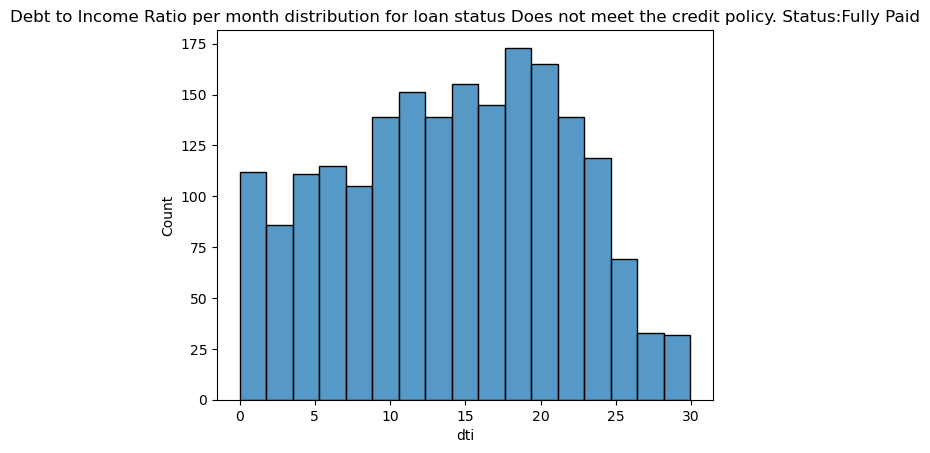

Maximum DTI for loan status Does not meet the credit policy. Status:Charged Off = 29.96


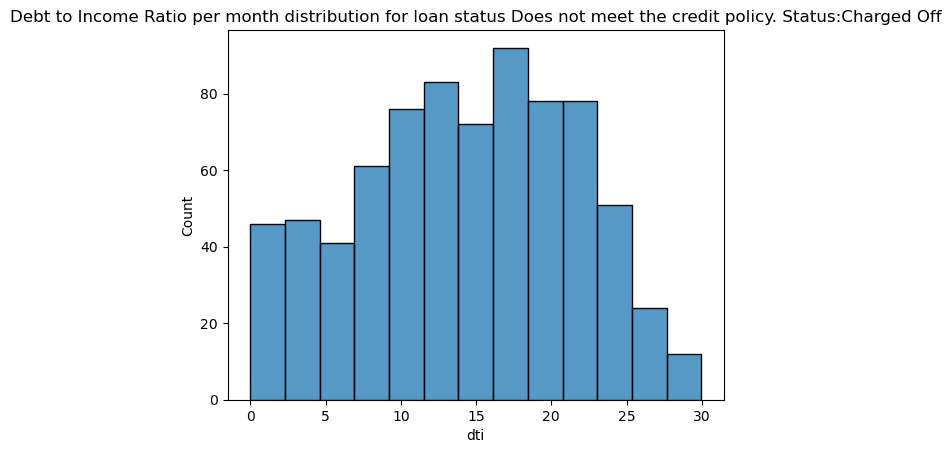

Maximum DTI for loan status Issued = 136.97


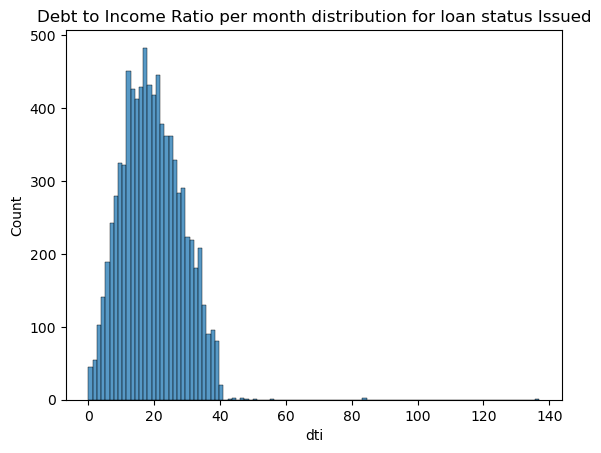

In [24]:
## check max DTI for each category
for i in df['loan_status'].unique():
    print(f"Maximum DTI for loan status {i} = {df[df['loan_status'] == i]['dti'].max()}")
    sns.histplot(data = df[df['loan_status'] == i], x = 'dti')
    plt.title(f"Debt to Income Ratio per month distribution for loan status {i}")
    plt.show()

In [25]:
## Clear outliers observed for status = "Current". Hence, removing extreme outliers
df = df[df['dti'] <= 200]

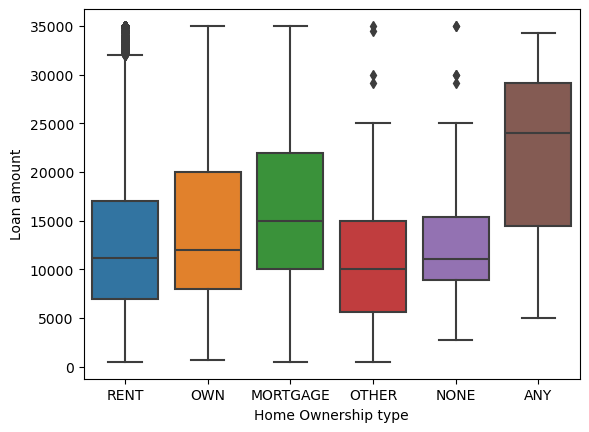

In [26]:
sns.boxplot(df, x = "home_ownership", y = "loan_amnt")
plt.xlabel("Home Ownership type")
plt.ylabel("Loan amount")
plt.show()

## It can be observed that home ownership does not have a significant effect on loan amount

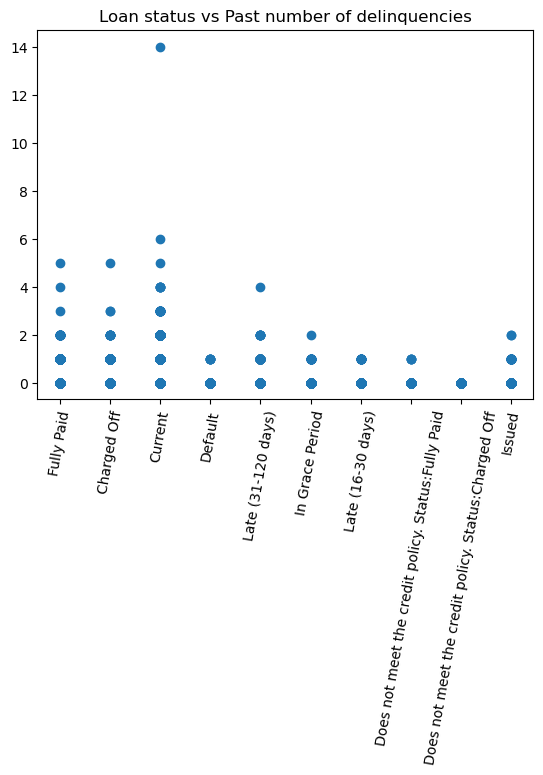

In [27]:
plt.scatter(x = df['loan_status'], y = df['acc_now_delinq'])
plt.xticks(rotation = 80)
plt.title("Loan status vs Past number of delinquencies")
plt.show()

## We have one outlier account with 14 past delinquencies in current status

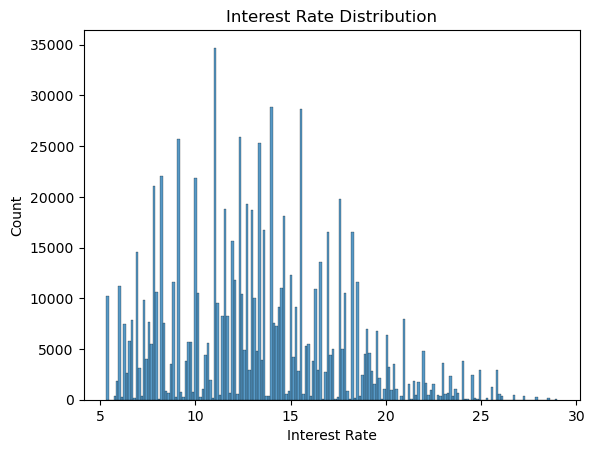

In [28]:
sns.histplot(data = df, x = "int_rate")
plt.title("Interest Rate Distribution")
plt.xlabel("Interest Rate")
plt.show()

## Borrower's are paying a minimum of ~5% to maximum of ~30% in interest on laons

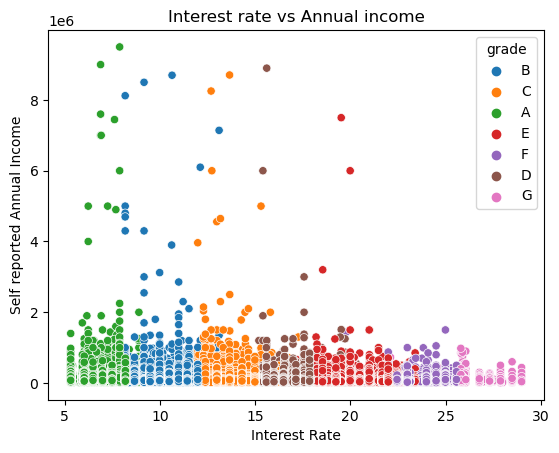

In [29]:
sns.scatterplot(data = df, x = "int_rate", y = "annual_inc", hue = "grade")
plt.title("Interest rate vs Annual income")
plt.xlabel("Interest Rate")
plt.ylabel("Self reported Annual Income")
plt.show()

## High annual incomes do not owe interest > 20% i.e income has an effect in rate of interest
## Grade determines rate of interest. G grade profiles pay/owe the highest interests

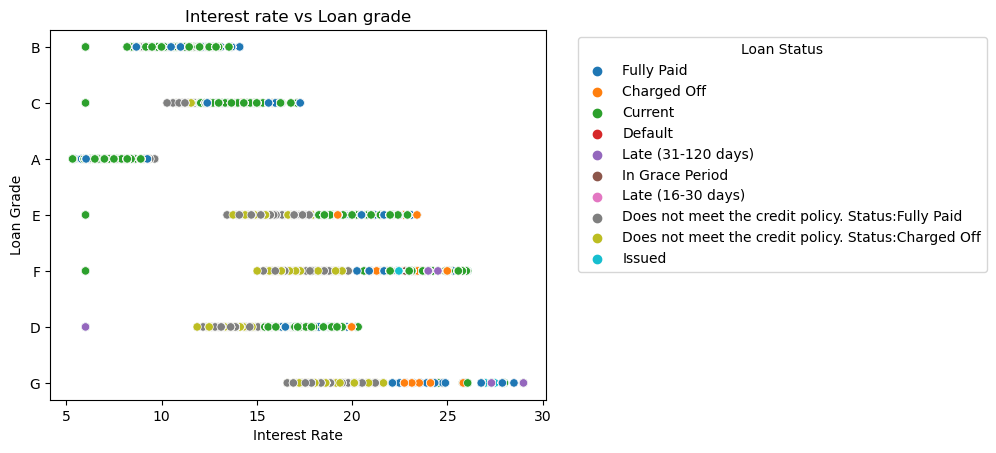

In [30]:
sns.scatterplot(data = df, x = "int_rate", y = "grade", hue = "loan_status")
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left', title = "Loan Status")
plt.title("Interest rate vs Loan grade")
plt.xlabel("Interest Rate")
plt.ylabel("Loan Grade")
plt.show()

## It can be observed that there's a lot of action going in lower grades of loans (D, E, F, G)
## Majority of the problematic loans have high interest rates
## Some very interesting patterns in loans that do not meet the credit policy. We cannot be absolutely certain from the plot that
## lower grade loans imply default/charge off

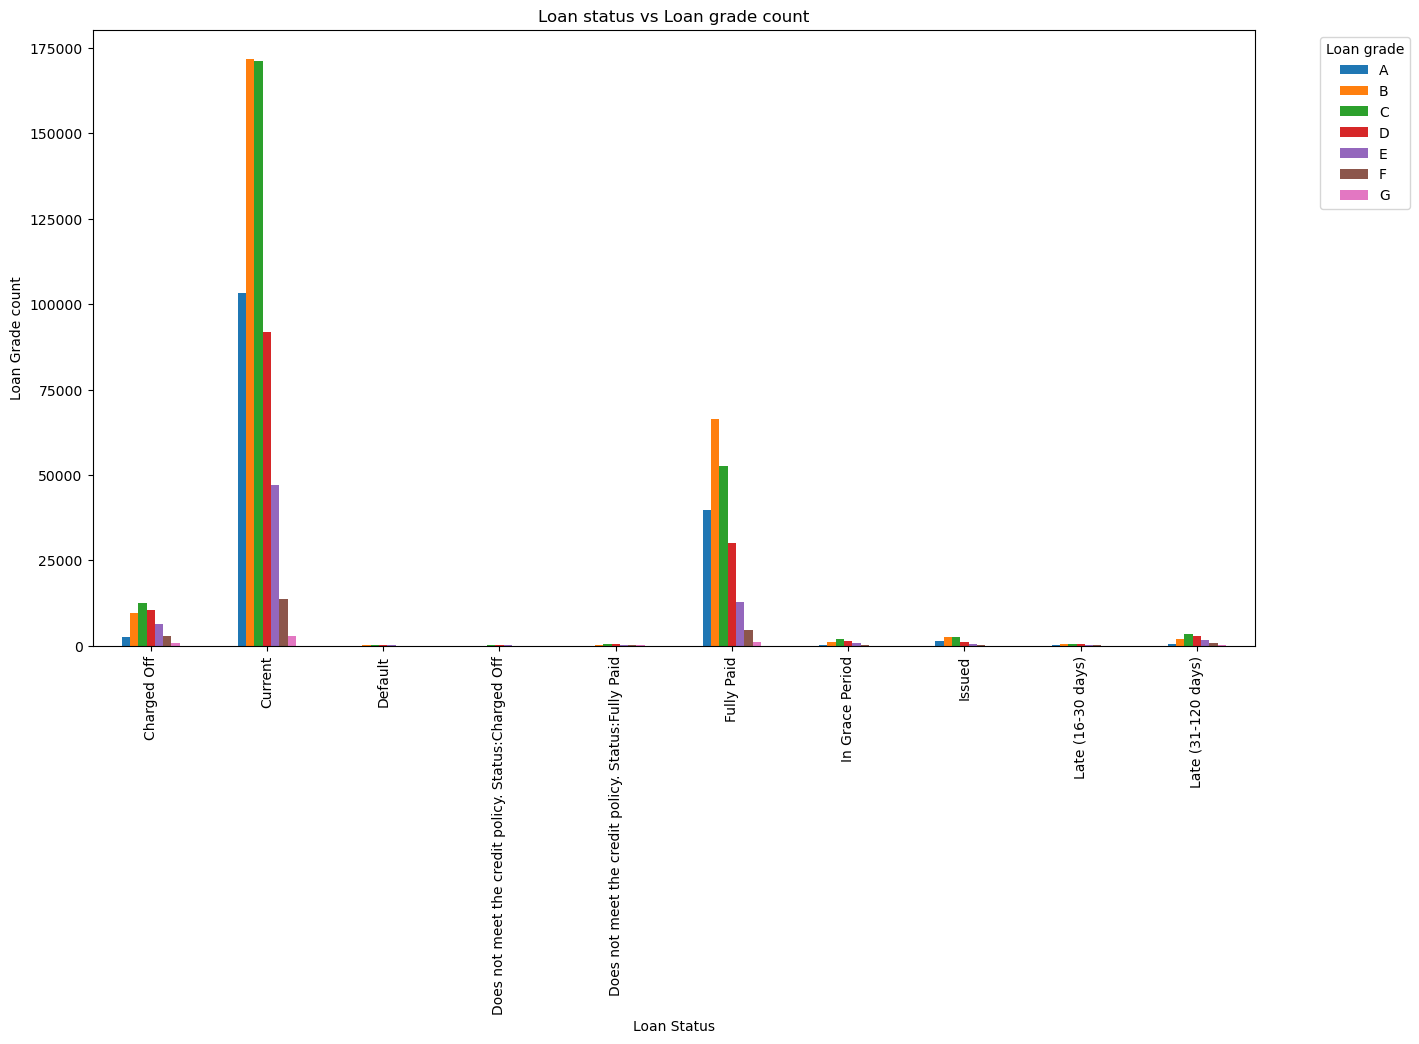

In [31]:
## Loan status vs loan grade frequency distribution
df.pivot_table(index = "loan_status", values = 'member_id', columns = 'grade', aggfunc = 'count').plot(kind = 'bar', figsize = (15,8))
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left', title = "Loan grade")
plt.title("Loan status vs Loan grade count")
plt.xlabel("Loan Status")
plt.ylabel("Loan Grade count")
plt.show()

## No clear indication of lower loan grades defaulting

## Data preparation

In [32]:
df.info() ## Check for data types and nulls

<class 'pandas.core.frame.DataFrame'>
Index: 887374 entries, 0 to 887378
Data columns (total 74 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           887374 non-null  int64  
 1   member_id                    887374 non-null  int64  
 2   loan_amnt                    887374 non-null  float64
 3   funded_amnt                  887374 non-null  float64
 4   funded_amnt_inv              887374 non-null  float64
 5   term                         887374 non-null  object 
 6   int_rate                     887374 non-null  float64
 7   installment                  887374 non-null  float64
 8   grade                        887374 non-null  object 
 9   sub_grade                    887374 non-null  object 
 10  emp_title                    835916 non-null  object 
 11  emp_length                   842553 non-null  object 
 12  home_ownership               887374 non-null  object 
 13  annu

In [33]:
df.loan_status.unique()  ## Check unique values in the target variable

array(['Fully Paid', 'Charged Off', 'Current', 'Default',
       'Late (31-120 days)', 'In Grace Period', 'Late (16-30 days)',
       'Does not meet the credit policy. Status:Fully Paid',
       'Does not meet the credit policy. Status:Charged Off', 'Issued'],
      dtype=object)

#### Reference dictionary for outcome class
$Fully \space Paid$: the loan has been fully repaid, either at the end of the loan term or earlier because of prepayment

$Current:$ All payments are made on time, and the loan is in good standing - Ideal

$Default:$ the loan has not been current for more than 120 days.

$Charged \space Off:$ LendingClub charges off a loan when we no longer reasonably expect further payments. Generally, charge-offs occur no later than 30 days after the loan enters Default status.

$Issued:$ Loan approved and disbursed

$In \space Grace \space Period:$ Payment date past due but date extended for payment without additional charge

$Does \space not \space meet \space the \space credit \space policy. \space Status:Fully \space Paid:$ Does on meet the creditor's policy but still disbursed loan as exception and fully paid

$Does \space not \space meet \space the \space credit \space policy. Status:Charged \space Off:$ Does on meet the creditor's policy but still disbursed loan as exception but defaulted and laon not recoverable by creditor

$Late \space (16-30 days):$ the loan hasn’t been current for 16–30 days. This is the first tranche of loan delinquency

$Late \space (31-120 days):$ the loan hasn’t been current for 31–120 days. This is the second tranche of loan delinquency

In [34]:
df.loan_status.value_counts(normalize = True)*100 ## % records with given status

loan_status
Current                                                67.815149
Fully Paid                                             23.408732
Charged Off                                             5.099090
Late (31-120 days)                                      1.306214
Issued                                                  0.953375
In Grace Period                                         0.704663
Late (16-30 days)                                       0.265615
Does not meet the credit policy. Status:Fully Paid      0.224032
Default                                                 0.137372
Does not meet the credit policy. Status:Charged Off     0.085759
Name: proportion, dtype: float64

In [35]:
## Get % nulls in each column and drop columns with high nulls

def removeNulls(data):
    
    """ Function to calculate and print columns having null values and gather columns with >40% null values"""
    drop = []
    for i in data.columns.tolist():
        nulls = data[i].isnull().sum() * 100/ len(data[i])
        if nulls > 0:
            print(f"{i} has: {np.round(nulls,5)} % nulls")
        if nulls > 40:
            drop.append(i)
    return drop

cols_to_drop = removeNulls(df)

emp_title has: 5.79891 % nulls
emp_length has: 5.05097 % nulls
annual_inc has: 0.00045 % nulls
desc has: 85.79787 % nulls
title has: 0.01724 % nulls
delinq_2yrs has: 0.00327 % nulls
earliest_cr_line has: 0.00327 % nulls
inq_last_6mths has: 0.00327 % nulls
mths_since_last_delinq has: 51.19724 % nulls
mths_since_last_record has: 84.55522 % nulls
open_acc has: 0.00327 % nulls
pub_rec has: 0.00327 % nulls
revol_util has: 0.05657 % nulls
total_acc has: 0.00327 % nulls
last_pymnt_d has: 1.98992 % nulls
next_pymnt_d has: 28.50782 % nulls
last_credit_pull_d has: 0.00597 % nulls
collections_12_mths_ex_med has: 0.01634 % nulls
mths_since_last_major_derog has: 75.01617 % nulls
annual_inc_joint has: 99.94298 % nulls
dti_joint has: 99.9432 % nulls
verification_status_joint has: 99.94298 % nulls
acc_now_delinq has: 0.00327 % nulls
tot_coll_amt has: 7.91955 % nulls
tot_cur_bal has: 7.91955 % nulls
open_acc_6m has: 97.59177 % nulls
open_il_6m has: 97.59177 % nulls
open_il_12m has: 97.59177 % nulls
ope

In [36]:
df.mths_since_last_delinq.max() ## Check for values in mths_since_last_delinq. This could be an important column

188.0

In [37]:
## % missing values for mths_since_last_delinq by loan status
df[df['mths_since_last_delinq'].isnull()]['loan_status'].value_counts() * 100/df['loan_status'].value_counts()

## There doesn't seem to be a clear pattern for missingness. But because > 50% columns are nulls we drop mths_since_last_delinq.
## Additionally, we have a column delinq_2yrs to capture the number of delinquencies in pat 2 years

loan_status
Current                                                49.580906
Fully Paid                                             55.727098
Charged Off                                            55.388083
Late (31-120 days)                                     47.562764
Issued                                                 47.470449
In Grace Period                                        43.834959
Late (16-30 days)                                      43.742045
Does not meet the credit policy. Status:Fully Paid     45.472837
Default                                                51.353568
Does not meet the credit policy. Status:Charged Off    38.764783
Name: count, dtype: float64

In [38]:
df_1 = df.copy() ## Create a copy for null value imputation and operations

In [39]:
df_1 = df_1.loc[:, df.columns.difference(cols_to_drop)] ## Drop columns with high nulls

In [40]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 887374 entries, 0 to 887378
Data columns (total 53 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   acc_now_delinq              887345 non-null  float64
 1   addr_state                  887374 non-null  object 
 2   annual_inc                  887370 non-null  float64
 3   application_type            887374 non-null  object 
 4   collection_recovery_fee     887374 non-null  float64
 5   collections_12_mths_ex_med  887229 non-null  float64
 6   delinq_2yrs                 887345 non-null  float64
 7   dti                         887374 non-null  float64
 8   earliest_cr_line            887345 non-null  object 
 9   emp_length                  842553 non-null  object 
 10  emp_title                   835916 non-null  object 
 11  funded_amnt                 887374 non-null  float64
 12  funded_amnt_inv             887374 non-null  float64
 13  grade              

In [41]:
## Investigate other columns which would not be needed for the analysis

df_1.emp_title.value_counts(dropna = False) ## Check employement titles provided to see if it can be used
## many unique values i.e 299272 and hence would cause unneeded high dimensionality if used

emp_title
NaN                                    51458
Teacher                                13469
Manager                                11240
Registered Nurse                        5525
Owner                                   5376
                                       ...  
Otis elevator technician                   1
Thomas J. Paul, Inc.                       1
Piggie Toes Preschool                      1
greystone park psychiatric hospital        1
Manager Hotel Operations Oasis             1
Name: count, Length: 299271, dtype: int64

In [42]:
df_1.title.value_counts() ## Check if user provided reason for loan is of use as we already have a laon category selected by user
## Contains duplicates and 63143 values and hence would cause unneeded high dimensionality if used

title
Debt consolidation                     413999
Credit card refinancing                164329
Home improvement                        40112
Other                                   31891
Debt Consolidation                      15760
                                        ...  
New Heater                                  1
Looking to get out of debt                  1
Debt Conso/Pay off initial LC loan          1
Emergency Home Repair                       1
Credit Card/Auto Repair                     1
Name: count, Length: 63143, dtype: int64

In [43]:
df_1.url.head() ## Check for the url column to see if it would be of any use.
## URL to LendingClub profiles which is of no use for analysis

0    https://www.lendingclub.com/browse/loanDetail....
1    https://www.lendingclub.com/browse/loanDetail....
2    https://www.lendingclub.com/browse/loanDetail....
3    https://www.lendingclub.com/browse/loanDetail....
4    https://www.lendingclub.com/browse/loanDetail....
Name: url, dtype: object

In [44]:
df_1.policy_code.value_counts(dropna= False) ## All values = 1

policy_code
1.0    887374
Name: count, dtype: int64

In [45]:
mem_id = df_1['member_id']

In [46]:
df_1 = df_1.drop(["url", "id", "member_id", "title", "emp_title", "policy_code", "recoveries", "collection_recovery_fee", "sub_grade"], axis = 1) ## Drop additional unrequired columns. 
## ID and member ID not needed as each row is a unique record
## Recoveries and collection_recovery_fee are associated with post charge off collection fee
## Retaining grade instead of sub-grade to avoid high-dimensionality and more generalizability

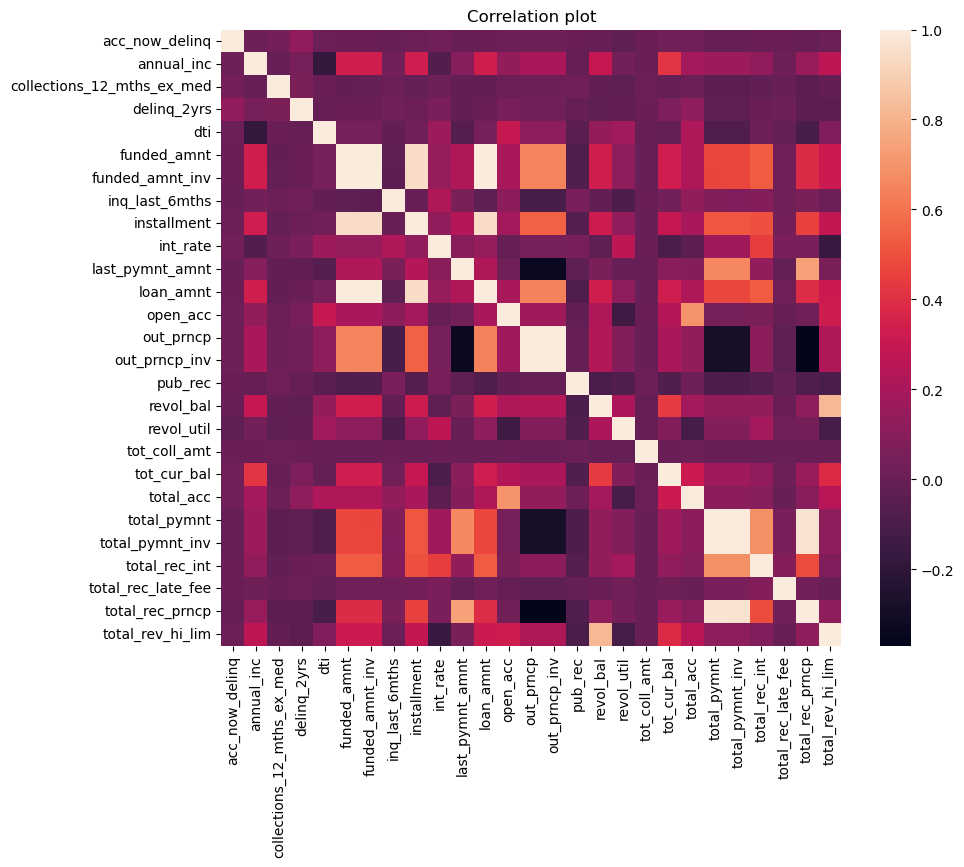

In [47]:
## Correlation heatmap of numeric variables

plt.figure(figsize = (10,8))
numeric_data = df_1.select_dtypes(include = np.number)
sns.heatmap(numeric_data.corr())
plt.title("Correlation plot")
plt.show()

Observations:

- Certain columns with very high correlation. It is expected as there are some columns which represent very similar parameters like funded_amnt (The total amount committed to that loan at that point in time) and funded_amnt_inv (The total amount committed by investors for that loan at that point in time), loan_amnt(The listed amount of the loan applied for by the borrower) which essentially represent the same variable loan amount.
- Same can be said for out_prncp (Remaining outstanding principal for total amount funded) and out_prncp_inv(Remaining outstanding principal for portion of total amount funded by investors)
- Same with total_rec_prncp (Principal received to date) and total_pymnt (Payments received to date for total amount funded) and total_pymnt_inv (Payments received to date for portion of total amount funded by investors)
- Hence, only one of the variables can be retained to obtained the neccessary relevant information

In [48]:
df_1[['funded_amnt', 'funded_amnt_inv', 'loan_amnt', 'installment']].corr() 
## Very high correlation can be observed which can lead to multicollinearity issues
## Installment would be directly linearly related to the total loan amount
## Hence, retaining only loan_amnt

,funded_amnt,funded_amnt_inv,loan_amnt,installment
funded_amnt,1.000000,0.998025,0.999263,0.946005
funded_amnt_inv,0.998025,1.000000,0.997115,0.943632
loan_amnt,0.999263,0.997115,1.000000,0.944977
installment,0.946005,0.943632,0.944977,1.000000


In [49]:
df_1[['out_prncp', 'out_prncp_inv']].corr() ## Almost per correlation retaining only out_prncp

,out_prncp,out_prncp_inv
out_prncp,1.000000,0.999997
out_prncp_inv,0.999997,1.000000


In [50]:
 df_1[['total_rec_prncp', 'total_pymnt', 'total_pymnt_inv']].corr() ## Retaining only total_pymnt

,total_rec_prncp,total_pymnt,total_pymnt_inv
total_rec_prncp,1.000000,0.970043,0.967496
total_pymnt,0.970043,1.000000,0.997592
total_pymnt_inv,0.967496,0.997592,1.000000


In [51]:
cols_to_drop = ['total_pymnt_inv', 'total_rec_prncp', 'out_prncp_inv', 'installment', 'funded_amnt', 'funded_amnt_inv']

df_1 = df_1.loc[:, df_1.columns.difference(cols_to_drop)] ## Drop highly correlated columns and retain only one

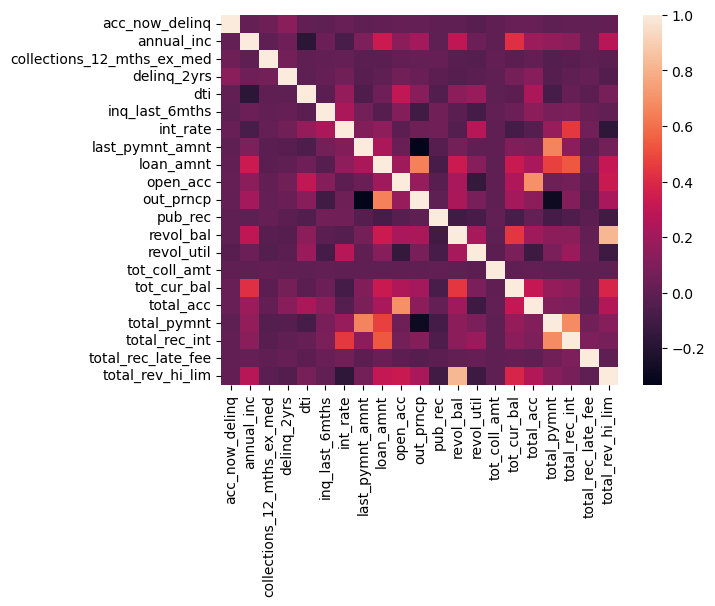

In [52]:
## Check
numeric = df_1.select_dtypes(include = np.number)

sns.heatmap(numeric.corr())
plt.show()

In [53]:
removeNulls(df_1)

acc_now_delinq has: 0.00327 % nulls
annual_inc has: 0.00045 % nulls
collections_12_mths_ex_med has: 0.01634 % nulls
delinq_2yrs has: 0.00327 % nulls
earliest_cr_line has: 0.00327 % nulls
emp_length has: 5.05097 % nulls
inq_last_6mths has: 0.00327 % nulls
last_credit_pull_d has: 0.00597 % nulls
last_pymnt_d has: 1.98992 % nulls
next_pymnt_d has: 28.50782 % nulls
open_acc has: 0.00327 % nulls
pub_rec has: 0.00327 % nulls
revol_util has: 0.05657 % nulls
tot_coll_amt has: 7.91955 % nulls
tot_cur_bal has: 7.91955 % nulls
total_acc has: 0.00327 % nulls
total_rev_hi_lim has: 7.91955 % nulls


[]

In [54]:
## inspect remaining null value columns with null % > 1 %. Dropping the rest nulls

df_1[['emp_length', 'last_pymnt_d', 'next_pymnt_d', 'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim']].head()

,emp_length,last_pymnt_d,next_pymnt_d,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
0,10+ years,Jan-2015,NaN,NaN,NaN,NaN
1,< 1 year,Apr-2013,NaN,NaN,NaN,NaN
2,10+ years,Jun-2014,NaN,NaN,NaN,NaN
3,10+ years,Jan-2015,NaN,NaN,NaN,NaN
4,1 year,Jan-2016,Feb-2016,NaN,NaN,NaN


In [55]:
## Filling emp_length null values with no no_data

df_1["emp_length"] = df_1.emp_length.fillna("no_data")

In [56]:
## Check for values in last_pymnt_d

df_1[df_1.last_pymnt_d.isnull()]["loan_status"].value_counts(dropna = False)

## It can be observed that majority of the accounts with null last payment date are 
## either new accounts/ Defaulted/ late payment accounts
## Newly issued accounts will not have a last payment date

loan_status
Issued                                                 8412
Current                                                8325
Charged Off                                             527
In Grace Period                                         212
Late (31-120 days)                                      120
Late (16-30 days)                                        41
Does not meet the credit policy. Status:Charged Off      12
Default                                                   9
Name: count, dtype: int64

In [57]:
## last_pymnt_d (last payment date month and year) and next_pymnt_d (next payment date month and year) are fields used to
## track the loan payments and glean th ehealth of the loan. If a borrower misses payment these fields would reflect it.
## The loan status provides this data for most part. Additionally, using this column in analysis will introduce high dimensionality
## Hence, dropping last_pymnt_d and next_pymnt_d

In [58]:
df_1[df_1.next_pymnt_d.isnull()]['loan_status'].value_counts() ## We do not have next payment date for all Fully Paid 
## and Charged Off accounts which makes sense. 
## In this case, the column basically tells us the loan status for most part which is captured by loan_status. 
## Hence, we can drop this column

loan_status
Fully Paid     207723
Charged Off     45248
Name: count, dtype: int64

In [59]:
df_1[df_1.tot_coll_amt.isnull()][['tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim']].isna().count()
## As suspected, tot_coll_amt, tot_cur_bal, total_rev_hi_lim are all null if one is null, i.e if tot_coll_amt is null,
## then corresponding tot_cur_bal, total_rev_hi_lim values are null

tot_coll_amt        70276
tot_cur_bal         70276
total_rev_hi_lim    70276
dtype: int64

In [60]:
df_1[df_1.tot_coll_amt.isnull()]['loan_status'].value_counts()

## Fully payed loans tot_coll_amt, tot_cur_bal and total_rev_hi_lim can be imputed as 0

loan_status
Fully Paid                                             53689
Charged Off                                            10019
Current                                                 3587
Does not meet the credit policy. Status:Fully Paid      1988
Does not meet the credit policy. Status:Charged Off      761
Late (31-120 days)                                       121
In Grace Period                                           66
Late (16-30 days)                                         27
Default                                                   18
Name: count, dtype: int64

In [61]:
## Fill Nulls in tot_coll_amt, tot_cur_bal and total_rev_hi_lim columns where loan_status is fully paid = 0

cols = ["tot_coll_amt", "tot_cur_bal", "total_rev_hi_lim"]

for i in cols:
    df_1.loc[df_1["loan_status"] == "Fully Paid", i] = df_1.loc[df_1["loan_status"] == "Fully Paid", i].fillna(0)


In [62]:
df_1 = df_1.drop(["last_pymnt_d", "next_pymnt_d"], axis =1)

In [67]:
df_1 = pd.concat([df_1, mem_id], axis =1)

In [68]:

## Check for nulls
removeNulls(df_1)

## Drop remaining null colmns

df_1 = df_1.dropna()

acc_now_delinq has: 0.00327 % nulls
annual_inc has: 0.00045 % nulls
collections_12_mths_ex_med has: 0.01634 % nulls
delinq_2yrs has: 0.00327 % nulls
earliest_cr_line has: 0.00327 % nulls
inq_last_6mths has: 0.00327 % nulls
last_credit_pull_d has: 0.00597 % nulls
open_acc has: 0.00327 % nulls
pub_rec has: 0.00327 % nulls
revol_util has: 0.05657 % nulls
tot_coll_amt has: 1.86922 % nulls
tot_cur_bal has: 1.86922 % nulls
total_acc has: 0.00327 % nulls
total_rev_hi_lim has: 1.86922 % nulls


In [69]:
df_1.info() ## Number of records is not significantly affected

<class 'pandas.core.frame.DataFrame'>
Index: 870251 entries, 0 to 887378
Data columns (total 37 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   acc_now_delinq              870251 non-null  float64
 1   addr_state                  870251 non-null  object 
 2   annual_inc                  870251 non-null  float64
 3   application_type            870251 non-null  object 
 4   collections_12_mths_ex_med  870251 non-null  float64
 5   delinq_2yrs                 870251 non-null  float64
 6   dti                         870251 non-null  float64
 7   earliest_cr_line            870251 non-null  object 
 8   emp_length                  870251 non-null  object 
 9   grade                       870251 non-null  object 
 10  home_ownership              870251 non-null  object 
 11  initial_list_status         870251 non-null  object 
 12  inq_last_6mths              870251 non-null  float64
 13  int_rate           

In [70]:
df_1.to_csv("Clean_LC_Data.csv", index = False)

In [71]:
## Check number of categories for each cateogrical column
for i in df_1.select_dtypes(exclude = ['number']).columns.tolist():
    print(f"{i} has {df_1[i].nunique()} values")

addr_state has 51 values
application_type has 2 values
earliest_cr_line has 697 values
emp_length has 12 values
grade has 7 values
home_ownership has 6 values
initial_list_status has 2 values
issue_d has 101 values
last_credit_pull_d has 99 values
loan_status has 8 values
purpose has 14 values
pymnt_plan has 2 values
term has 2 values
verification_status has 3 values
zip_code has 934 values


### Feature engineering

In [72]:
data = pd.read_csv("Clean_LC_Data.csv")

In [73]:
data.head()

,acc_now_delinq,addr_state,annual_inc,application_type,collections_12_mths_ex_med,delinq_2yrs,dti,earliest_cr_line,emp_length,grade,...,tot_coll_amt,tot_cur_bal,total_acc,total_pymnt,total_rec_int,total_rec_late_fee,total_rev_hi_lim,verification_status,zip_code,member_id
0,0.0,AZ,24000.0,INDIVIDUAL,0.0,0.0,27.65,Jan-1985,10+ years,B,...,0.0,0.0,9.0,5861.071414,861.07,0.00,0.0,Verified,860xx,1296599
1,0.0,IL,12252.0,INDIVIDUAL,0.0,0.0,8.72,Nov-2001,10+ years,C,...,0.0,0.0,10.0,3003.653644,603.65,0.00,0.0,Not Verified,606xx,1313524
2,0.0,CA,49200.0,INDIVIDUAL,0.0,0.0,20.00,Feb-1996,10+ years,C,...,0.0,0.0,37.0,12226.302212,2209.33,16.97,0.0,Source Verified,917xx,1277178
3,0.0,AZ,36000.0,INDIVIDUAL,0.0,0.0,11.20,Nov-2004,3 years,A,...,0.0,0.0,12.0,5631.377753,631.38,0.00,0.0,Source Verified,852xx,1311441
4,0.0,CA,48000.0,INDIVIDUAL,0.0,0.0,5.35,Jan-2007,9 years,E,...,0.0,0.0,4.0,3938.144334,938.14,0.00,0.0,Source Verified,900xx,1288686


In [74]:
## Import dateutil for date operations
from dateutil.relativedelta import relativedelta

def dateDiff(row):
    diff = relativedelta(row['issue_d'], row['earliest_cr_line'])
    return diff.years * 12 + diff.months

## Convert all date columns into appropriate format

data['earliest_cr_line'] = pd.to_datetime(data['earliest_cr_line'], format = '%b-%Y')

data['issue_d'] = pd.to_datetime(data['issue_d'], format = '%b-%Y')

data['last_credit_pull_d'] = pd.to_datetime(data['last_credit_pull_d'], format = '%b-%Y')

In [75]:
## Use earliest_cr_line and issue_d to create a new column credit_history_len
## We can drop earliest_cr_line

data['credit_history_len'] = data.apply(dateDiff, axis = 1)
data = data.drop("earliest_cr_line", axis = 1)

In [76]:
def creditPull(row):
    """ Calculates months since last credit history pulled """
    
    diff = relativedelta(row['last_credit_pull_d'], row['issue_d'])
    return diff.years * 12 + diff.months

data["last_credit_pull_m"] = data.apply(creditPull, axis = 1)

## Negetive values indicate that the credit history was pulled before issue date and hasn't been pulled since then

data = data.drop("last_credit_pull_d", axis = 1)

In [77]:
data['issue_month'] = data['issue_d'].dt.strftime('%b')
data['issue_year'] = data['issue_d'].dt.year

data = data.drop("issue_d", axis = 1)

## Separate issue month and issue year and store as categorical variable

data['issue_month'] = data['issue_month'].astype('category')
data['issue_year'] = data['issue_year'].astype('category')

In [78]:
for i in data.select_dtypes(exclude = ['number']).columns.tolist():
    print(f"{i} has {data[i].nunique()} values")

addr_state has 51 values
application_type has 2 values
emp_length has 12 values
grade has 7 values
home_ownership has 6 values
initial_list_status has 2 values
loan_status has 8 values
purpose has 14 values
pymnt_plan has 2 values
term has 2 values
verification_status has 3 values
zip_code has 934 values
issue_month has 12 values
issue_year has 9 values


##### Primary objective of the model is to predict the risk of default for the loan
- We need to predict the credit risk for LC, i.e if a given borrower will default / probability of default.
- For this, we can treat the loan status of "Current", "Issued", "In grace period", "late" as true hold out sample for which we predict the possibility/ risk of default for these classes
- We train the model using accounts that have "Fully Paid" the loan or loan status as "Default" or those that have been "Charged off" or are ""Late" or "In grace period".
- Positive class is loan_status = [ "Default", "Charged off"] as all these loans have either defaulted, Because the firm (here, Lending Club) is a P2P lender, risk apetite is low and hence the classification.
- Negetive class is "Fully Paid"
- Loans that have been "Charged off" are basically defaulted loans which are not recoverable. 

In [79]:
data.loan_status.value_counts()

## There is an imbalance in data. This can be of issue when training logistic model,
## but tree based models should not have a problem.

loan_status
Current               597913
Fully Paid            207506
Charged Off            35201
Late (31-120 days)     11461
Issued                  8457
In Grace Period         6185
Late (16-30 days)       2328
Default                 1200
Name: count, dtype: int64

In [80]:
data = data.drop("zip_code", axis = 1) ## Dropping zip code as we donot have full zip code and we use state instead 
## to glean location related info

In [81]:
data.to_csv("Clean_LC_Data_Final.csv", index = False)

## Explore unsupervised clustering to check if we have natural clusters

In [75]:
data = pd.read_csv("Clean_LC_Data_Final.csv")
data['issue_year'] = data['issue_year'].astype('category')

In [83]:
data_c = data.copy()
data_c = data_c.drop(['loan_status', 'member_id'], axis = 1)

#### K-Modes clustering using categorical columns

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 5178529.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 0, cost: 5178529.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 0, cost: 5178529.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 0, cost: 5178529.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 0, cost: 5178529.0
Best run was number 1
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 246987, cost: 4681223.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 239346, cost: 4623288.0
Init: initializing centroids
Init: initializing clu

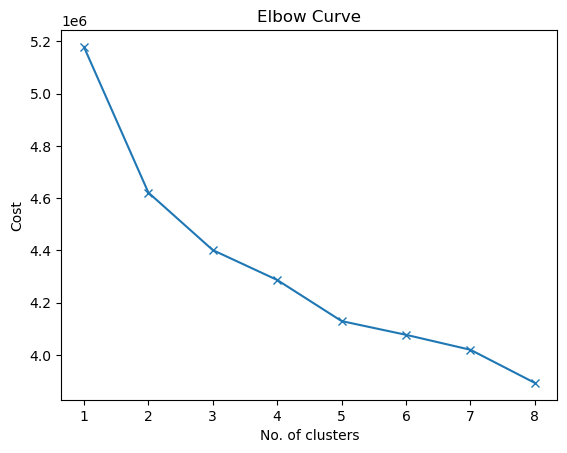

In [84]:
from kmodes.kmodes import KModes 

cat = data_c.select_dtypes(include = ["object", "category"])

cost = [] 
K = range(1,9) 
for k in list(K): 
    kmode = KModes(n_clusters=k, init = "random", n_init = 5, verbose=1) 
    kmode.fit_predict(cat) 
    cost.append(kmode.cost_) 
      
plt.plot(K, cost, 'x-') 
plt.xlabel('No. of clusters') 
plt.ylabel('Cost') 
plt.title('Elbow Curve') 
plt.show()

In [7]:
## We have elbows at k = 2 and k = 4. Hence, taking number of ideal clusters as k = 3 by 
np.random.seed(10)
kmode = KModes(n_clusters = 2, init = "random", n_init = 5, verbose = 1) 
kmode.fit_predict(cat)
centroids = kmode.cluster_centroids_
clusters = kmode.predict(cat)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 247300, cost: 4650510.0
Run 1, iteration: 2/100, moves: 80500, cost: 4640622.0
Run 1, iteration: 3/100, moves: 16265, cost: 4640622.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 177470, cost: 4829505.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 237111, cost: 4734126.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 148113, cost: 4694252.0
Run 4, iteration: 2/100, moves: 139505, cost: 4694252.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 136359, cost: 4731842.0
Best run was number 1


In [8]:
## Concat clusters with dataframe for analysis
kmode_df = pd.concat([data, pd.Series(clusters, name = 'cluster')], axis = 1)

kmode_df['cluster'] = kmode_df['cluster'].astype('category')

,acc_now_delinq,addr_state,annual_inc,application_type,collections_12_mths_ex_med,delinq_2yrs,dti,emp_length,grade,home_ownership,...,total_pymnt,total_rec_int,total_rec_late_fee,total_rev_hi_lim,verification_status,credit_history_len,last_credit_pull_m,issue_month,issue_year,cluster
0,0.0,AZ,24000.0,INDIVIDUAL,0.0,0.0,27.65,10+ years,B,RENT,...,5861.071414,861.07,0.00,0.0,Verified,323,49,Dec,2011,1
1,0.0,IL,12252.0,INDIVIDUAL,0.0,0.0,8.72,10+ years,C,RENT,...,3003.653644,603.65,0.00,0.0,Not Verified,121,49,Dec,2011,1
2,0.0,CA,49200.0,INDIVIDUAL,0.0,0.0,20.00,10+ years,C,RENT,...,12226.302212,2209.33,16.97,0.0,Source Verified,190,37,Dec,2011,1
3,0.0,AZ,36000.0,INDIVIDUAL,0.0,0.0,11.20,3 years,A,RENT,...,5631.377753,631.38,0.00,0.0,Source Verified,85,45,Dec,2011,0
4,0.0,CA,48000.0,INDIVIDUAL,0.0,0.0,5.35,9 years,E,RENT,...,3938.144334,938.14,0.00,0.0,Source Verified,59,36,Dec,2011,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
870251,0.0,CA,31000.0,INDIVIDUAL,0.0,0.0,28.69,8 years,B,RENT,...,3971.880000,1027.35,0.00,17100.0,Verified,124,12,Jan,2015,0
870252,0.0,NJ,79000.0,INDIVIDUAL,0.0,0.0,3.90,10+ years,B,MORTGAGE,...,9532.390000,2465.65,0.00,10200.0,Verified,490,12,Jan,2015,0
870253,0.0,TN,35000.0,INDIVIDUAL,0.0,0.0,30.90,5 years,D,RENT,...,3769.740000,1925.24,0.00,18000.0,Verified,136,12,Jan,2015,0
870254,0.0,MA,64400.0,INDIVIDUAL,1.0,1.0,27.19,1 year,E,RENT,...,3787.670000,2234.98,0.00,27000.0,Source Verified,135,12,Jan,2015,0


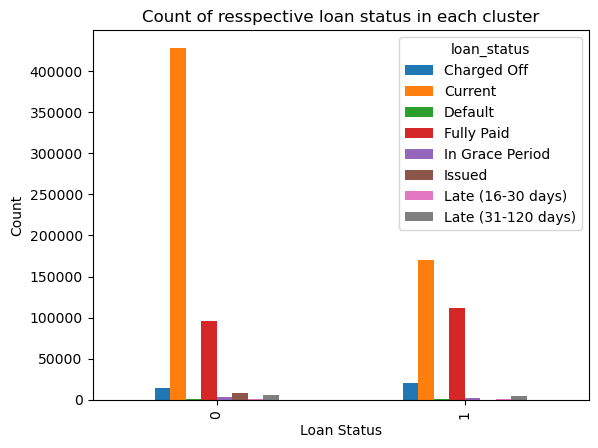

In [70]:
kmode_df.pivot_table(index = 'cluster', columns =  'loan_status', values = 'home_ownership', aggfunc = 'count').plot(kind = 'bar')
plt.title('Count of resspective loan status in each cluster')
plt.xlabel('Loan Status')
plt.ylabel('Count')
plt.show()

## We can observe that there is no significant visible difference in Defaulted/ Charged Off loans in each cluster

#### K-Means clustering using numeric columns

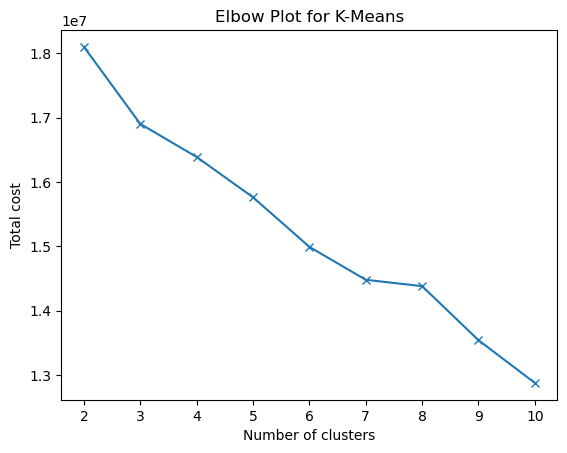

In [79]:
#from kmodes.kprototypes import KPrototypes
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

numeric_cols = data_c.select_dtypes(include = ["int64", "float64"])

scaler = StandardScaler()
numeric_cols = scaler.fit_transform(numeric_cols)

X = numeric_cols
#X = data_c.sample(20000).values

mse = []
n_clusters = range(2,11)

np.random.seed(11)
for k in n_clusters:
    #kproto = KPrototypes(n_clusters = k, init = "cao", verbose = 0)
    #kproto.fit(X, categorical = [1,3,7,8,9,10,18,19,22,30,33,34])
    kmeans = KMeans(n_clusters=k, random_state=0, n_init="auto").fit(X)
    mse.append(kmeans.inertia_)

plt.plot(n_clusters, mse, marker='x')
plt.title('Elbow Plot for K-Means')
plt.xlabel('Number of clusters')
plt.ylabel('Total cost')
plt.show()

## We can observe that for continuous variables, we do not observe an elbow at a resoanble number of clusters

In [86]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
## Run K-Means with n=2 clusters
numeric_cols = data_c.select_dtypes(include = ["int64", "float64"])
kmeans = KMeans(n_clusters = 2, random_state=0, n_init="auto").fit(numeric_cols)
clusters = kmeans.labels_
kmean_df = pd.concat([data, pd.Series(clusters, name = 'cluster')], axis = 1)

kmean_df['cluster'] = kmean_df['cluster'].astype('category')

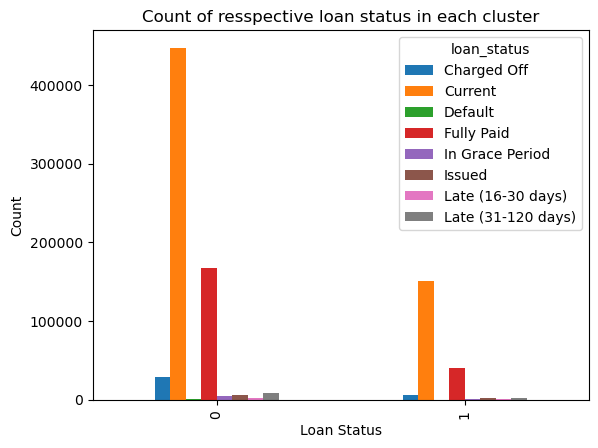

In [87]:
kmean_df.pivot_table(index = 'cluster', columns =  'loan_status', values = 'home_ownership', aggfunc = 'count').plot(kind = 'bar')
plt.title('Count of resspective loan status in each cluster')
plt.xlabel('Loan Status')
plt.ylabel('Count')
plt.show()

## We can observe that there is no significant visible difference in Defaulted/ Chared Off loans in each cluster

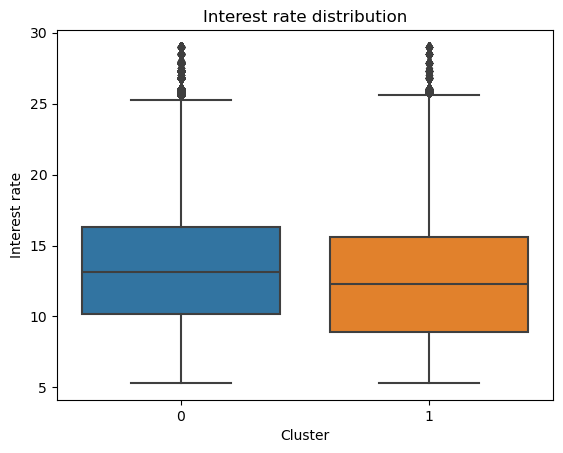

In [123]:
sns.boxplot(data = kmean_df, y = 'int_rate', x = 'cluster')
plt.title('Interest rate distribution')
plt.xlabel('Cluster')
plt.ylabel('Interest rate')
plt.show()

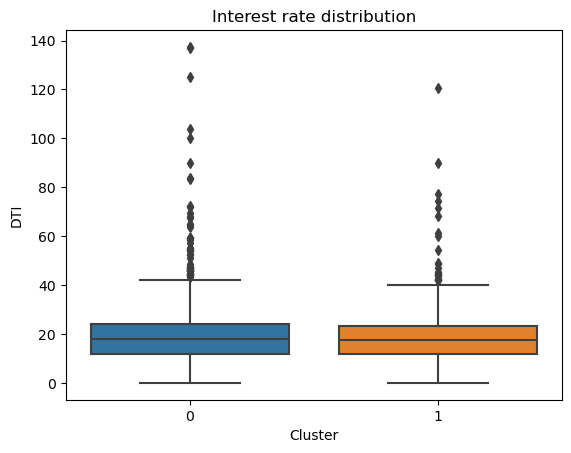

In [125]:
sns.boxplot(data = kmean_df, y = 'dti', x = 'cluster')
plt.title('Interest rate distribution')
plt.xlabel('Cluster')
plt.ylabel('DTI')
plt.show()

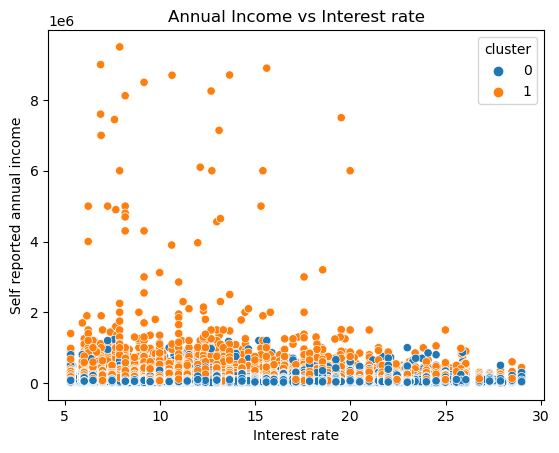

In [124]:
sns.scatterplot(data = kmean_df, y = 'annual_inc', x = 'int_rate', hue = 'cluster')
plt.title('Annual Income vs Interest rate')
plt.ylabel('Self reported annual income')
plt.xlabel('Interest rate')
plt.show()

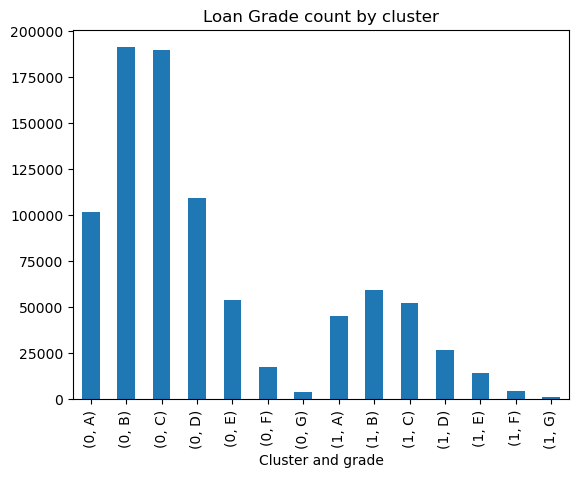

In [139]:
kmean_df[['cluster','grade']].value_counts(sort = False).plot(kind = 'bar', title = 'Loan Grade count by cluster', xlabel = 'Cluster and grade')
plt.show()

Observations:

- While cluster 0 has more "Fully Paid" borrowers compared to cluster 1, it also has more "Charged off" and "Defaulted" borrowers.
- Additionally, the plots indicate that there is no clear separating factor/parameter 
- The clusters do do not group borrowers into unique groups and provide insights on likehood of defaulting
- One of the reasons could be we did not all the variables for cluster. K-prototypes is much suited for our dataset as be have a mix of numeric and categorical variables
- Or clustering is simply not the way to go. We need supervised learning

#### PCA using numeric columns

[0.15770198 0.1173074  0.07501153 0.06974433 0.0575272  0.04931444
 0.04670599 0.04513219]


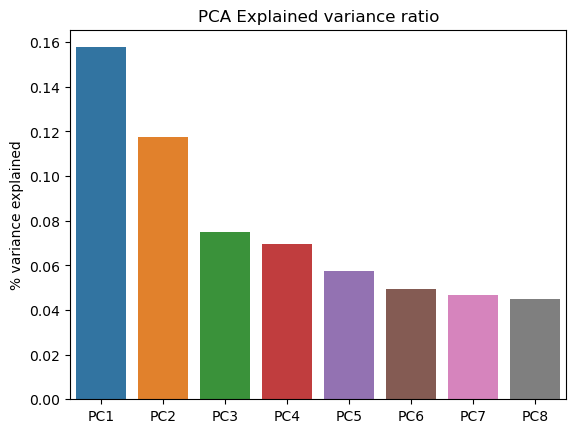

In [88]:
## We perform PCA only using numeric columns because PCA cannot handle space matrices. 
## Because our data has a large number of categorical columns which when encoded will create sparse matrices, we only use numeric columns.
## Additionally, because PCA creates variance-covariance matrix to get eigen values and vectors, it is better to use numeric columns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

numeric_cols = data_c.select_dtypes(include = ["int64", "float64"])

scaler = StandardScaler()
numeric_cols = scaler.fit_transform(numeric_cols)

X = numeric_cols

pca = PCA(n_components = 8)
pca.fit_transform(X)
print(pca.explained_variance_ratio_)
sns.barplot(x = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8'], y = pca.explained_variance_ratio_)
plt.title('PCA Explained variance ratio')
plt.ylabel("% variance explained")
plt.show()

## PCA explained variance ratio does not have a large tilt towards any single principle component

### Notes on unsuprevised exploration:

- Exept for K-Means clustering of numeric variables, we do not observed any significant differences between the ideal and non-ideal loans.
- K-Means may be hinting towards the fact that numeric variables may act as a good dicriminator to identify bad loans/ probability of default. But the model is not sound as the elbow plot has no clear indication of favourable number of clusters, and we are not considering majority of the columns that are categorical in nature
- PCA does not indicate any one or few specific components explaining the variances, hence we do nont pursue it.
- While a k-prototype model would be a better fit to accomodate for mix of numeric and categorical types, it is computationally expensive and hence we conclude unsupervised exploration here
- The results from this indicate the need for a supervised algorithm for our purpose

## Separate training and true OOS data
- Training data will consist of records with loan status "Fully Paid", "Charged off" and "Default"
- While the validation data will contain loans with status "Current", "Issued", "Late (31-120 days)" and "Late (16-30 days)"

##### The idea being that we build / train our model using loan outcomes with ideal (Fully Paid) and non-ideal (Charged off, Default) outcomes to predict the risk of default / accounts to pay closer supervision which are currently active

In [76]:
## Function to Standardize and Encode X variables

def standardize(X, model = "all"):
    from sklearn.preprocessing import StandardScaler, OneHotEncoder ## import the necessary libraries
    
    cat = X.select_dtypes(include = ["object", "category"]).columns ## Categorical columns need to be one hot encoded
    num = X.select_dtypes(include = ["float64", "int64"]).columns ## Numeric columns are standardized

    scaler = StandardScaler()

    X[num] = scaler.fit_transform(X[num])

    encoder = OneHotEncoder(sparse = False)
    
    if model == "Logistic":
        X = pd.get_dummies(X, columns = cat, drop_first = True)
    else:
        X = pd.get_dummies(X, columns = cat)
 
    for col in X.columns:
        if X[col].dtype == 'bool':
            X[col] = X[col].astype(int)
    return X

In [110]:
## If status is "Charged Off", "Default" we consider bad/non-ideal accounts, 
## If "Fully Paid" good/ideal account

#status = ["Fully Paid", "Charged Off", "Default", "Late (31-120 days)", "Late (16-30 days)"]

status = ["Fully Paid", "Charged Off", "Default"]
train_data = data[data.loan_status.isin(status)]


train_data['outcome'] = train_data['loan_status'].map(lambda x: 0 if x == "Fully Paid" else 1)

## The data with loan_status "Current", "Issued" or "In Grace Period" will be used 
## to identify accounts at a risk of defaulting

test_data = data[~data.loan_status.isin(status)]

<Axes: xlabel='outcome'>

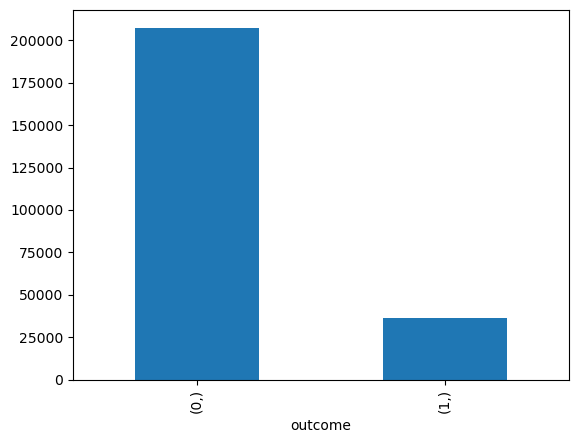

In [6]:
train_data[['outcome']].value_counts().plot(kind = 'bar') 
## We have a skewed data with more accounts being fully paid compared to 
## defaulted/late/charged off
## This can be a problem for logistic regression models

### Prepare data for logistic regression

In [78]:
## From the last step, it can be observed that the outcomes are imbalanced. i.e more "Fully Paid" compared to "Defaulted"/ "Charged off"
## Under such circumstances, logistic regression model can become biased towards class 0 making our model specific rather than sensitive
## We need our model to be more specific than sensitive. i.e predict class 1 with high accuracy and we are allowed to have 
## false positives because the the downsides of default is more detrimental than no default. Hence, we need our model to be more specific

## One way to avoid this bias directly is through balancing of data which is what is being done

data_1 = train_data[train_data['outcome'] ==1]
data_0 = train_data[train_data['outcome'] ==0]

data_0_sample = data_0.sample(n = len(data_1), random_state = 0) ## Undersampling class 0 which is the majority class
data_0_test = data_0.loc[data_0_sample.index.difference] ## Left out samples for class 0

data_logit = pd.concat([data_1.reset_index(drop = True),data_0_sample.reset_index(drop=True)], axis = 0)

## Shuffle the data
data_logit = data_logit.sample(frac = 1, random_state = 1).reset_index(drop = True)

In [114]:
## Separate independant and dependant variables for model development
y_logit = data_logit['outcome']
X_logit = standardize(data_logit[data_logit.columns.difference(['outcome', 'loan_status', 'member_id'])], model = "Logistic")

In [115]:
## Prepare test data i.e currently active accounts data for model

X_current = standardize(test_data[test_data.columns.difference(['outcome', 'loan_status', 'member_id'])])

## Modelling

### 1. Regularized Logistic regression

##### Logistic regression CV with data balancing

In [116]:
## Import necessary libraries
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, accuracy_score, confusion_matrix, precision_score, f1_score, recall_score, ConfusionMatrixDisplay, precision_recall_curve

In [117]:
## Because our data is high dimensional, we need to cut down on non-important fields
## Hence we do 5-fold cross-validation with lasso regularized Logistic Regression to choose the best model with meaningful variables

from sklearn.linear_model import LogisticRegressionCV

X_train, X_test, y_train, y_test = train_test_split(X_logit, y_logit, test_size=0.3, random_state=42) ## 70-30 split of training and testing data


logit_cv = LogisticRegressionCV(cv = 5, penalty = 'l1', solver = 'liblinear', Cs = 10)

logit_cv.fit(X_train, y_train) ## Fit model

Cs = logit_cv.Cs_  ## Get all values of C that have been tried for penalization
best_c = logit_cv.C_[0] ## Get C value with OOS performance in CV
cv_scores = logit_cv.scores_[1] ## Get ptobabilities
mean_cv_scores = np.mean(cv_scores, axis = 0) ## Get MSE scores for CV

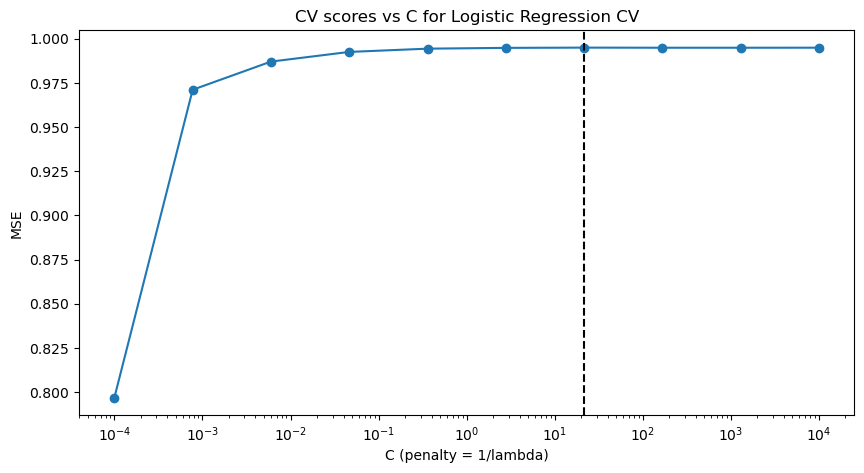

Best C: 21.54434690031882


In [118]:
## C vs average MSE plot for Cross Validation

plt.figure(figsize = (10,5))
plt.semilogx(Cs, mean_cv_scores, marker = 'o', label = 'Mean CV scores for L1 regularized Logistic Regression')
plt.axvline(best_c, color = 'black', linestyle = '--', label = f'Best C: {best_c}')
plt.xlabel('C (penalty = 1/lambda)')
plt.ylabel('MSE')
plt.title('CV scores vs C for Logistic Regression CV')
plt.show()

print(f'Best C: {best_c}')

OOS MSE for best model = 0.004990613982876242
OOS Recall for best model = 0.992571533382245
OOS Accuracy for best model = 0.9950093860171237
f1 for best model = 0.9949896575499885


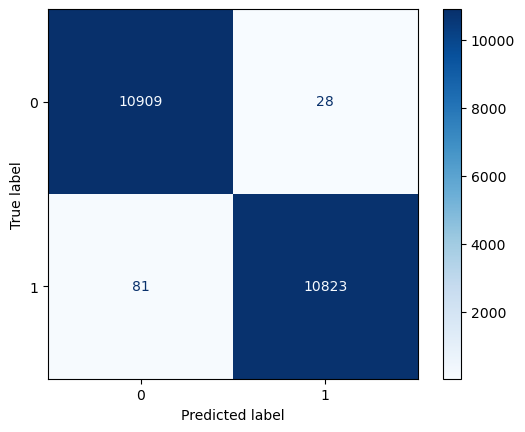

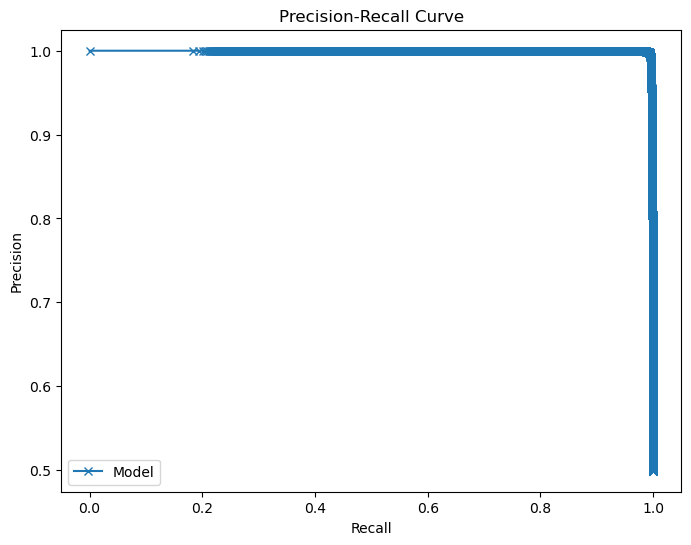

In [120]:
## Logistic Model OOS performance evaluation 

y_pred = logit_cv.predict(X_test) ## OOS classifcation with p(Default Threshold) = 0.5
y_scores_logit = logit_cv.predict_proba(X_test)[:, 1]

mse = mean_squared_error(y_test, y_pred)
print(f'OOS MSE for best model = {mse}')

recall = recall_score(y_test, y_pred)
print(f'OOS Recall for best model = {recall}')

accuracy = accuracy_score(y_test, y_pred)
print(f'OOS Accuracy for best model = {accuracy}')

f1 = f1_score(y_test, y_pred)
print(f'f1 for best model = {f1}')

conf_m = confusion_matrix(y_test, y_pred)
cm = ConfusionMatrixDisplay(confusion_matrix = conf_m)
cm.plot(cmap = plt.cm.Blues)
plt.show()

## Precision Recall curve is not of much consequence here because our data is balanced in this case
precision, recall, thresholds = precision_recall_curve(y_test, y_scores_logit)
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, marker='x', label='Model')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

OOS MSE for user defined threshold = 0.015979121835080812
OOS Recall for user defined threshold = 0.9966984592809978
OOS Accuracy for user defined threshold = 0.9840208781649192
f1 for user defined threshold = 0.9841974190627122


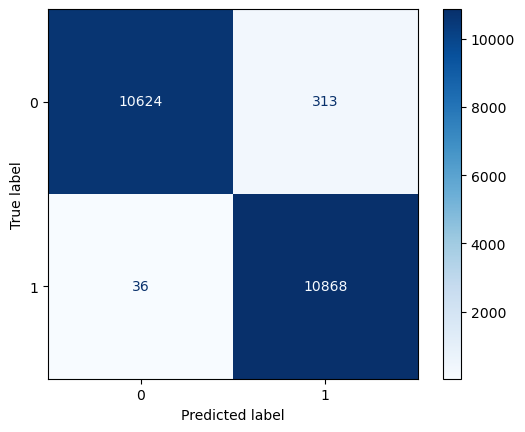

In [88]:
## Check model OOS performance for our defined default probability threshold of 0.125
## i.e accounts whose p(Default) >=0.125 are classified as risky or otherwise

y_pred_new = np.array([0 if x < 0.125 else 1 for x in y_scores_logit.tolist()])

mse = mean_squared_error(y_test, y_pred_new)
print(f'OOS MSE for user defined threshold = {mse}')

recall = recall_score(y_test, y_pred_new)
print(f'OOS Recall for user defined threshold = {recall}')

accuracy = accuracy_score(y_test, y_pred_new)
print(f'OOS Accuracy for user defined threshold = {accuracy}')

f1 = f1_score(y_test, y_pred_new)
print(f'f1 for user defined threshold = {f1}')

conf_m = confusion_matrix(y_test, y_pred_new)
cm = ConfusionMatrixDisplay(confusion_matrix = conf_m)
cm.plot(cmap = plt.cm.Blues)
plt.show()

Notes:
- Decreasing the classfication threshold probability slightly improves our Recall, which is the key metric of interest
- The Threshold increase does not affect the f1 score by much, hence, our model is stable and does a great job of identifying risky and ideal accounts.
- But this model has limitations in th fact that it is trained on a smaller dataset that the following models. 

### 2. Random Forest

In [121]:
X = standardize(train_data[train_data.columns.difference(['outcome', 'loan_status', 'member_id'])])
y = train_data['outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

OOS MSE for best model = 0.007653096087354625
OOS Recall for best model = 0.9554373739226114
OOS Accuracy for best model = 0.9923469039126454
f1 for best model = 0.9738317757009346


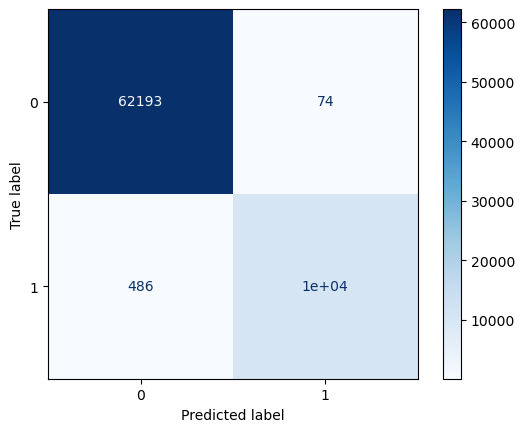

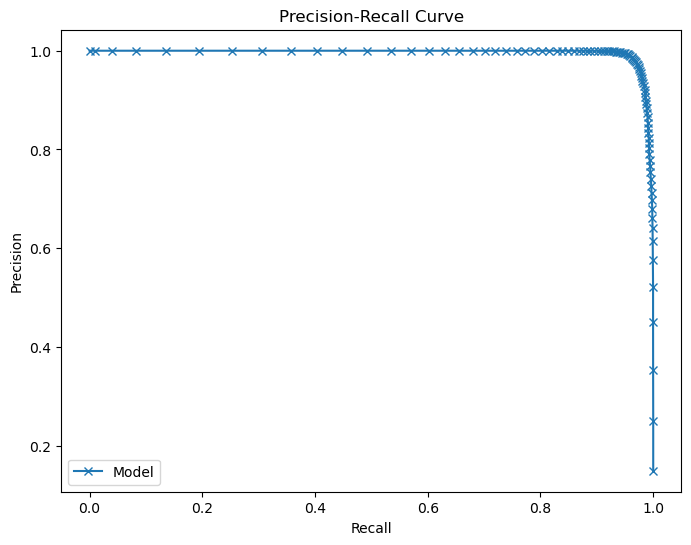

In [105]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(random_state = 0)

forest.fit(X_train, y_train)

#y_pred_rf = forest.predict(X_test)
y_scores_rf = forest.predict_proba(X_test)[:, 1]

y_pred_rf = forest.predict(X_test)

mse = mean_squared_error(y_test, y_pred_rf)
print(f'OOS MSE for model = {mse}')

recall = recall_score(y_test, y_pred_rf)
print(f'OOS Recall for model = {recall}')

accuracy = accuracy_score(y_test, y_pred_rf)
print(f'OOS Accuracy for model = {accuracy}')

f1 = f1_score(y_test, y_pred_rf)
print(f'f1 for model = {f1}')

conf_m = confusion_matrix(y_test, y_pred_rf)
cm = ConfusionMatrixDisplay(confusion_matrix = conf_m)
cm.plot(cmap = plt.cm.Blues)
plt.show()

## Trade-off between precision and recall is not as high, the model handels the class imbalance well
precision, recall, thresholds = precision_recall_curve(y_test, y_scores_rf)
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, marker='x', label='Model')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

OOS MSE for user defined threshold = 0.05277903051672065
OOS Recall for user defined threshold = 0.9957821382725105
OOS Accuracy for user defined threshold = 0.9472209694832794
f1 for user defined threshold = 0.8490344773668986


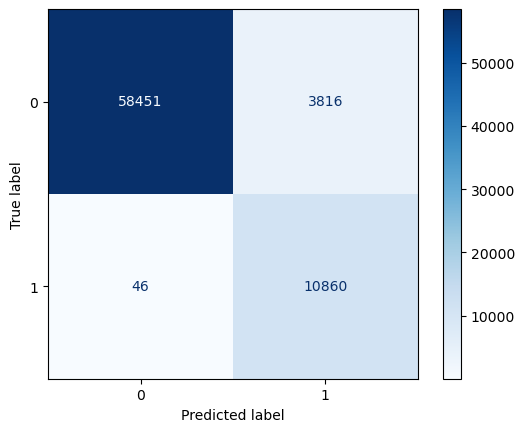

In [106]:
y_pred_new = np.array([0 if x < 0.125 else 1 for x in y_scores_rf.tolist()])

mse = mean_squared_error(y_test, y_pred_new)
print(f'OOS MSE for user defined threshold = {mse}')

recall = recall_score(y_test, y_pred_new)
print(f'OOS Recall for user defined threshold = {recall}')

accuracy = accuracy_score(y_test, y_pred_new)
print(f'OOS Accuracy for user defined threshold = {accuracy}')

f1 = f1_score(y_test, y_pred_new)
print(f'f1 for user defined threshold = {f1}')

conf_m = confusion_matrix(y_test, y_pred_new)
cm = ConfusionMatrixDisplay(confusion_matrix = conf_m)
cm.plot(cmap = plt.cm.Blues)
plt.show()

Notes:

- Decreasing the classfication threshold probability, improves our Recall by 4%
- The Threshold increase drastically effects the f1 score (~13%), hence, our model performance is sensitive to the classification threshold.

### 3. Gradient boosted trees

In [122]:
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0).fit(X_train, y_train)

y_pred_gbc = gbc.predict(X_test)
y_scores_gbc = gbc.predict_proba(X_test)[:, 1]

OOS MSE for best model = 0.004783185054596641
OOS Recall for best model = 0.9752429855125619
OOS Accuracy for best model = 0.9952168149454034
f1 for best model = 0.9838127832762926


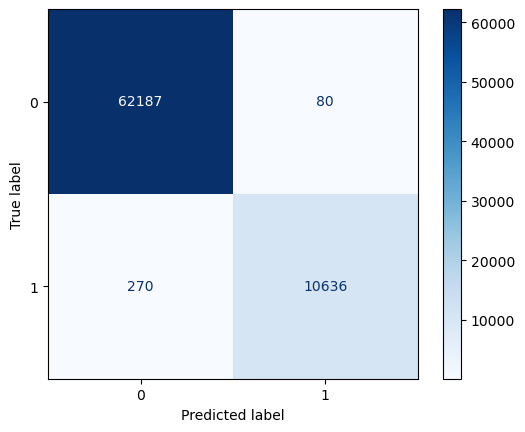

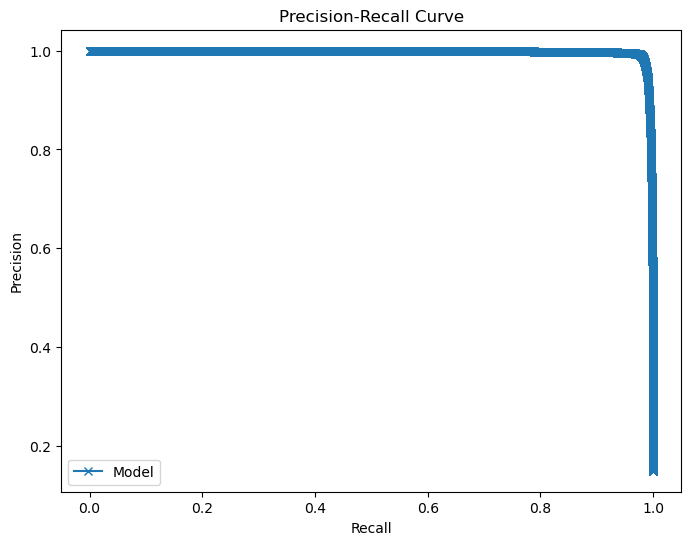

In [123]:
mse = mean_squared_error(y_test, y_pred_gbc)
print(f'OOS MSE for best model = {mse}')

recall = recall_score(y_test, y_pred_gbc)
print(f'OOS Recall for best model = {recall}')

accuracy = accuracy_score(y_test, y_pred_gbc)
print(f'OOS Accuracy for best model = {accuracy}')

f1 = f1_score(y_test, y_pred_gbc)
print(f'f1 for best model = {f1}')

conf_m = confusion_matrix(y_test, y_pred_gbc)
cm = ConfusionMatrixDisplay(confusion_matrix = conf_m)
cm.plot(cmap = plt.cm.Blues)
plt.show()

## Trade-off between precision and recall is not as high, the model handels the class imbalance well. In fact much better than random forest
precision, recall, thresholds = precision_recall_curve(y_test, y_scores_gbc)
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, marker='x', label='Model')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

OOS MSE for user defined threshold = 0.014007899088461591
OOS Recall for user defined threshold = 0.9915642765450211
OOS Accuracy for user defined threshold = 0.9859921009115384
f1 for user defined threshold = 0.9547521299607116


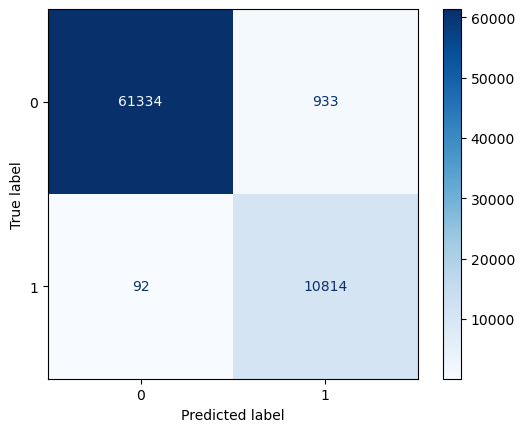

In [124]:
y_pred_new = np.array([0 if x < 0.125 else 1 for x in y_scores_gbc.tolist()])

mse = mean_squared_error(y_test, y_pred_new)
print(f'OOS MSE for user defined threshold = {mse}')

recall = recall_score(y_test, y_pred_new)
print(f'OOS Recall for user defined threshold = {recall}')

accuracy = accuracy_score(y_test, y_pred_new)
print(f'OOS Accuracy for user defined threshold = {accuracy}')

f1 = f1_score(y_test, y_pred_new)
print(f'f1 for user defined threshold = {f1}')

conf_m = confusion_matrix(y_test, y_pred_new)
cm = ConfusionMatrixDisplay(confusion_matrix = conf_m)
cm.plot(cmap = plt.cm.Blues)
plt.show()

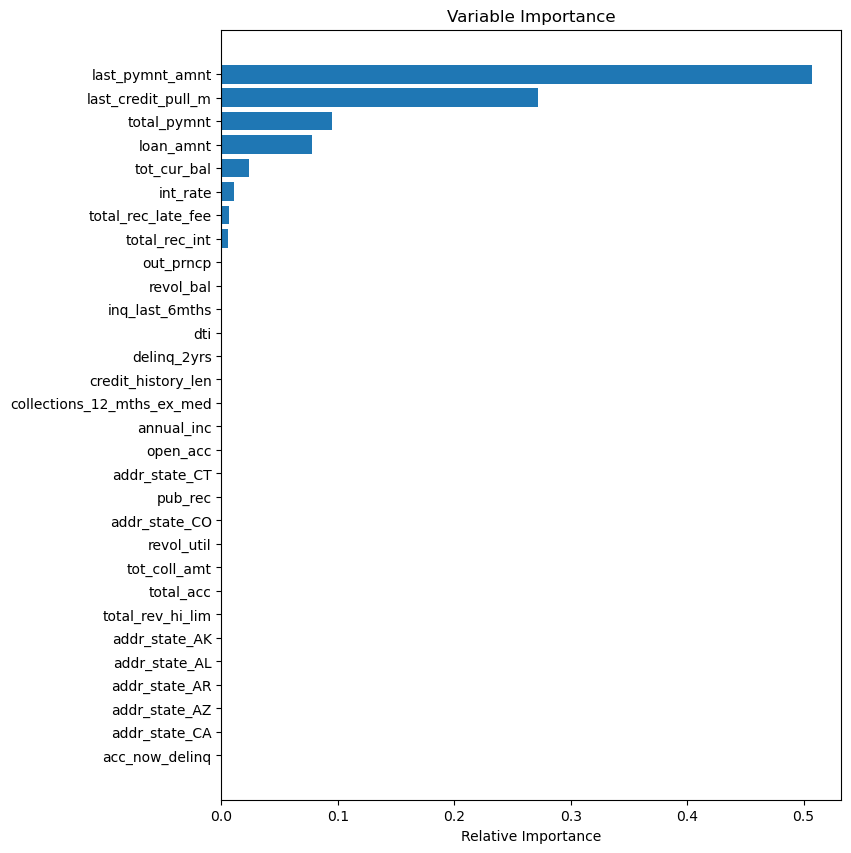

In [125]:
feature_importance = gbc.feature_importances_[:30]
# make importances relative to max importance
#feature_importance = 100.0 * (feature_importance / feature_importance.max())[:30]
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0])

plt.figure(figsize=(8, 10))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X.keys()[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

## Best model selection

- We observe that the Lasso logistic regression model has the best performance of the 3 models. 
- But, the major concern is that the model is trained on a subset of the training data due to undersampling the majority class
- Our second best model is the XGBoost model. Hence, to ensure that a good generalization is maintained, we could use the average probability scores from both xgboost and logistic regression to calculate the defautl risk

## Default probability prediction for existing/active accounts

In [126]:
y_pred_prob_gbc = gbc.predict_proba(X_current)[:,1].tolist()
y_pred_prob_logit = logit_cv.predict_proba(X_current[X_logit.columns.tolist()])[:,1].tolist()

y_pred_prob = [np.round((gbc + logit) / 2,3) for gbc, logit in zip(y_pred_prob_gbc, y_pred_prob_logit)]
y_pred = np.array([0 if x <= 0.125 else 1 for x in y_pred_prob])

d_nd = pd.Series(y_pred, name = 'Default/No Default')
prob = pd.DataFrame(y_pred_prob, columns = ['Default_probability'])

results = pd.concat([test_data.reset_index(drop = True), d_nd, prob], axis =1)

In [127]:
results.head()

,acc_now_delinq,addr_state,annual_inc,application_type,collections_12_mths_ex_med,delinq_2yrs,dti,emp_length,grade,home_ownership,...,total_rec_late_fee,total_rev_hi_lim,verification_status,member_id,credit_history_len,last_credit_pull_m,issue_month,issue_year,Default/No Default,Default_probability
0,0.0,MI,55000.0,INDIVIDUAL,0.0,0.0,22.87,10+ years,B,OWN,...,0.0,59900.0,Verified,12000897,326,24,Dec,2013,0,0.0
1,0.0,CA,26000.0,INDIVIDUAL,0.0,0.0,25.12,1 year,C,RENT,...,0.0,15100.0,Not Verified,12011200,83,25,Dec,2013,0,0.0
2,0.0,CT,105000.0,INDIVIDUAL,0.0,0.0,14.05,10+ years,A,MORTGAGE,...,0.0,61100.0,Not Verified,1319523,237,25,Dec,2013,0,0.0
3,0.0,FL,63000.0,INDIVIDUAL,0.0,0.0,16.51,2 years,A,MORTGAGE,...,0.0,15400.0,Not Verified,12011167,189,25,Dec,2013,0,0.0
4,0.0,CO,130000.0,INDIVIDUAL,0.0,0.0,13.03,10+ years,B,MORTGAGE,...,0.0,16200.0,Source Verified,11971241,193,25,Dec,2013,0,0.0


### Post prediction analysis to identify risky account characteristics

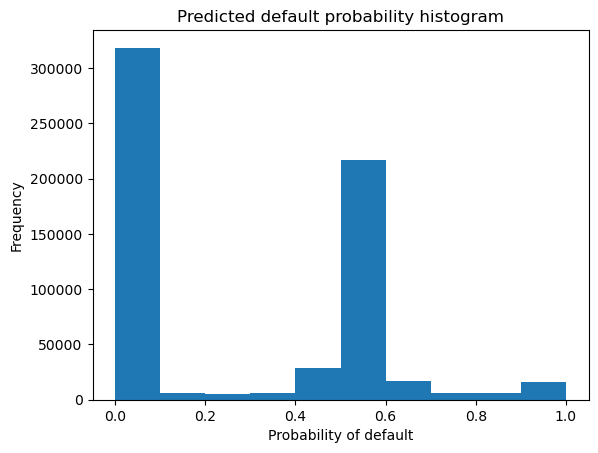

In [128]:
results['Default_probability'].plot(kind = 'hist', title = "Predicted default probability histogram", xlabel = "Probability of default")
plt.show()

<Figure size 1000x500 with 0 Axes>

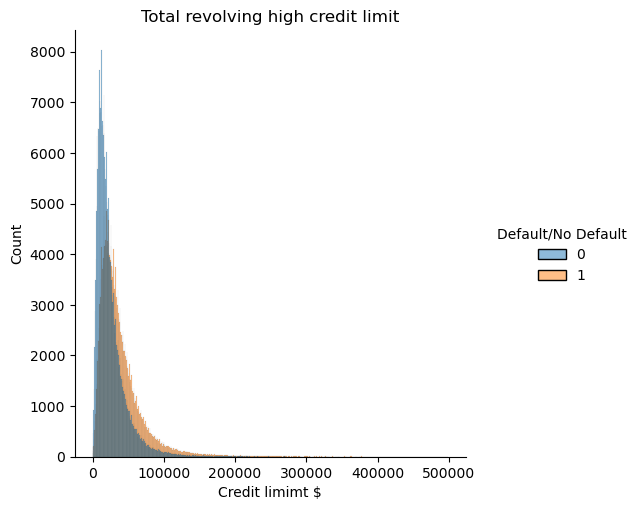

In [129]:
plt.figure(figsize = (10,5))
sns.displot(data = results[results['total_rev_hi_lim'] < 500000], x = 'total_rev_hi_lim', hue = 'Default/No Default')
plt.title('Total revolving high credit limit')
plt.xlabel('Credit limimt $')
plt.show()
## [results['Default/No Default'] == 0]

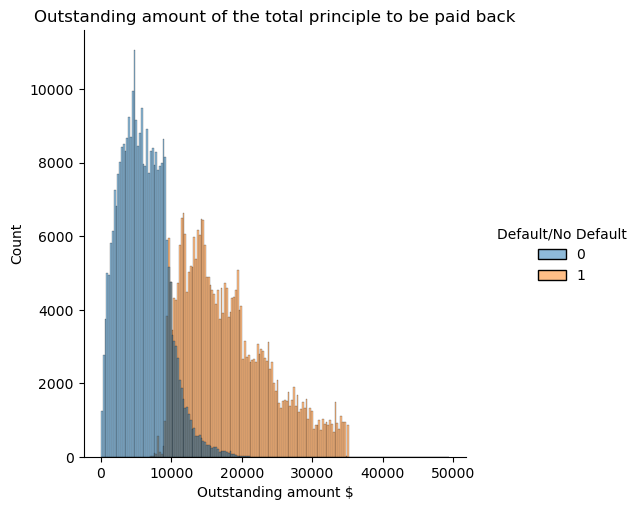

In [130]:
sns.displot(data = results, x = 'out_prncp', hue = 'Default/No Default')
plt.title('Outstanding amount of the total principle to be paid back')
plt.xlabel('Outstanding amount $')
plt.show()
## [results['Default/No Default'] == 0]

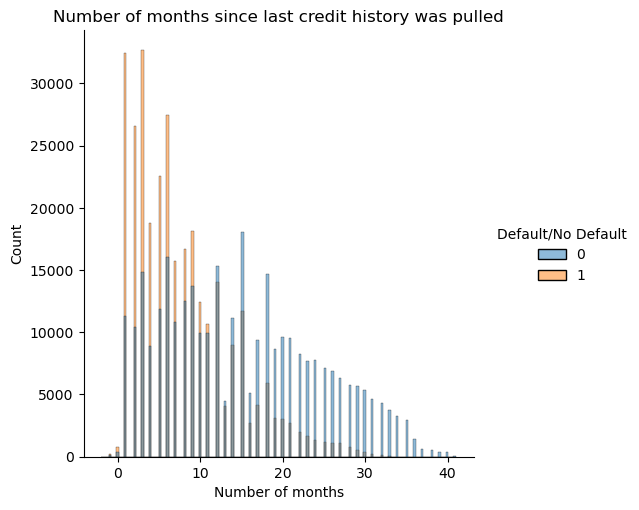

In [131]:
sns.displot(data = results, x = 'last_credit_pull_m', hue = 'Default/No Default')
plt.title('Number of months since last credit history was pulled')
plt.xlabel('Number of months')
plt.show()

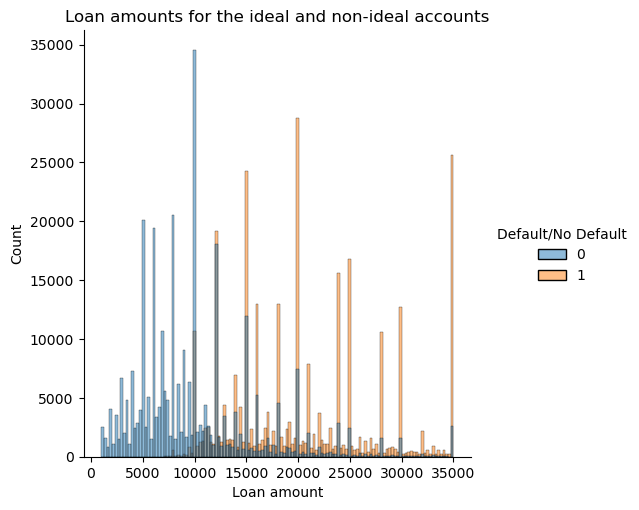

In [132]:
sns.displot(data = results, x = 'loan_amnt', hue = 'Default/No Default')
plt.title('Loan amounts for the ideal and non-ideal accounts')
plt.xlabel('Loan amount')
plt.show()
## [results['Default/No Default'] == 0]

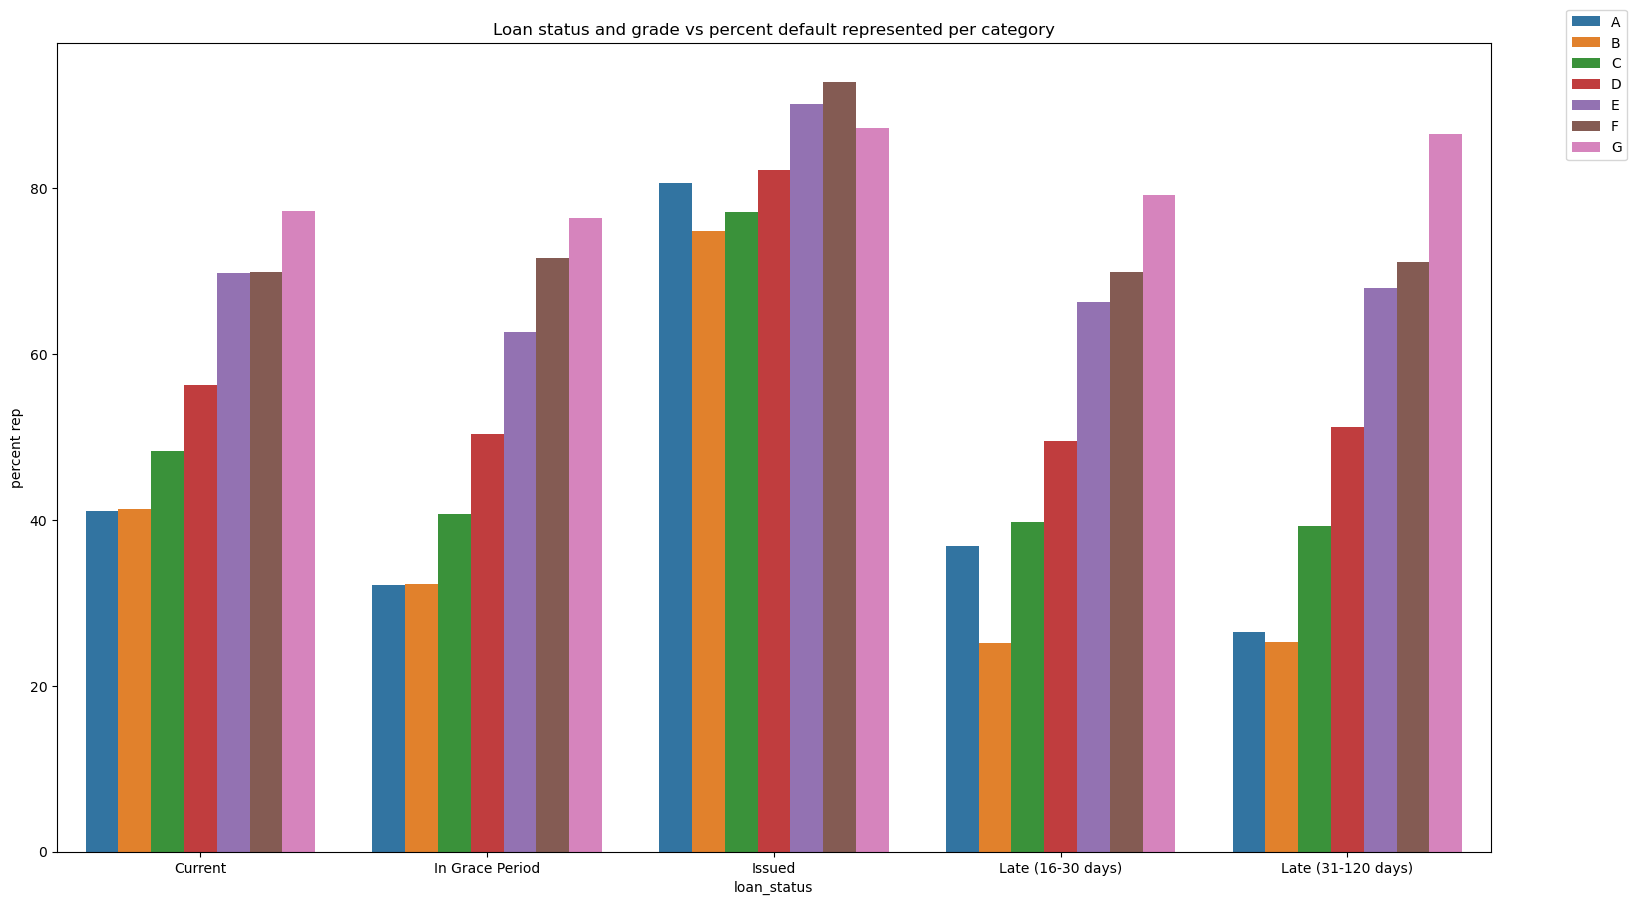

In [133]:
temp1 = results[results['Default_probability']>=0.125][['loan_status', 'grade']].value_counts(sort = False).reset_index(name='Default Count')
temp2 = results[['loan_status', 'grade']].value_counts(sort = False).reset_index(name='Count')
temp1['percent rep'] = temp1['Default Count'] * 100/temp2['Count']

ax = plt.subplot(111)
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
sns.barplot(data = temp1, x = "loan_status", y = "percent rep", hue = "grade")
plt.title('Loan status and grade vs percent default represented per category')
ax.legend(bbox_to_anchor=(1.1, 1.05))
plt.show()

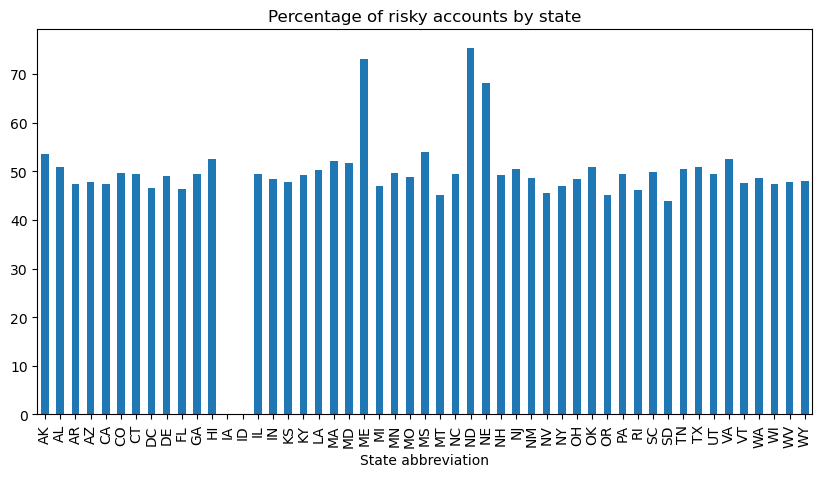

In [134]:
plt.figure(figsize = (10,5))
(results[results['Default/No Default'] == 1]['addr_state'].value_counts() * 100/results['addr_state'].value_counts()).plot(
    kind = 'bar', title = 'Percentage of risky accounts by state', xlabel = 'State abbreviation')
plt.show()

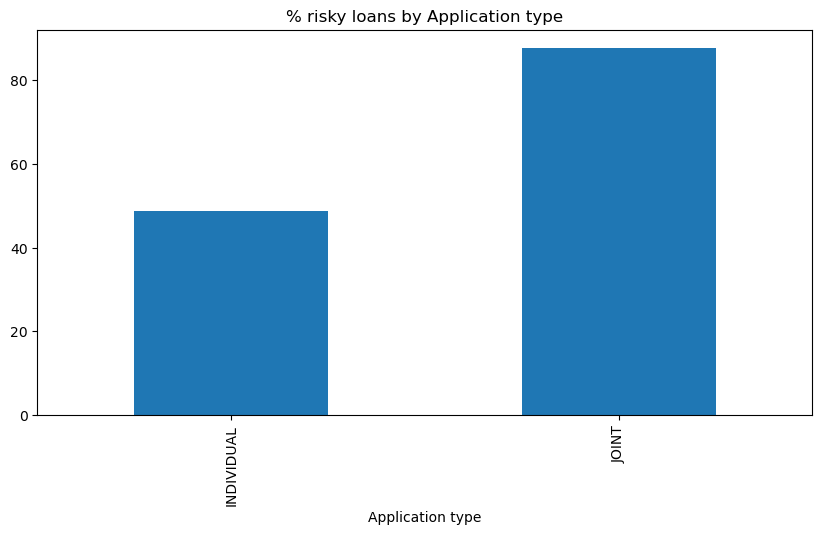

In [135]:
plt.figure(figsize = (10,5))
(results[results['Default/No Default'] == 1]['application_type'].value_counts() * 100/results['application_type'].value_counts()).plot(
    kind = 'bar', title = '% risky loans by Application type', xlabel = 'Application type')
plt.show()

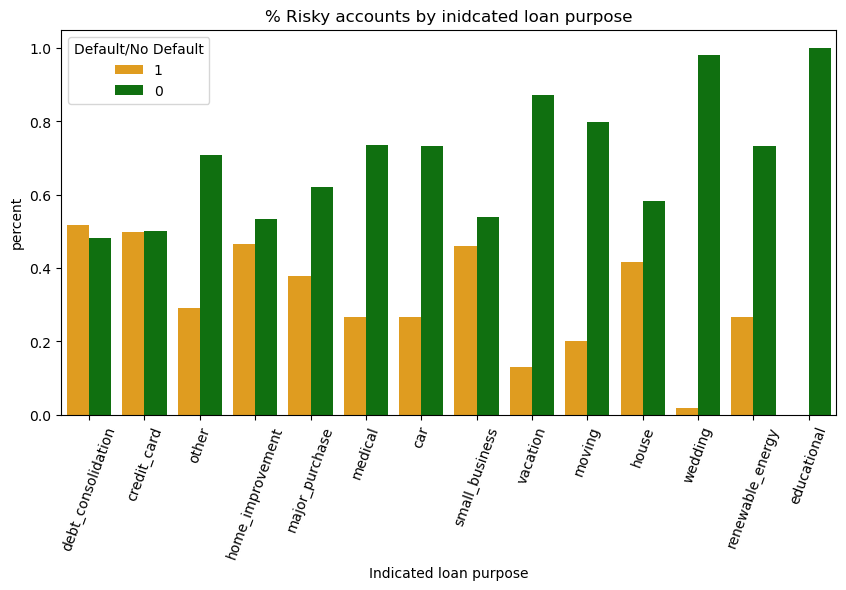

In [136]:
plt.figure(figsize = (10,5))
temp = (results[['Default/No Default','purpose']].value_counts() /results['purpose'].value_counts()).reset_index(name = 'percent')
temp['Default/No Default'] = temp['Default/No Default'].astype('str')
plt.xticks(rotation = 70)
palette = {'1': 'orange', '0': 'green'}
sns.barplot(data = temp, x = 'purpose', y = 'percent', hue = 'Default/No Default', palette = palette)
plt.title('% Risky accounts by inidcated loan purpose')
plt.xlabel('Indicated loan purpose')
plt.show()

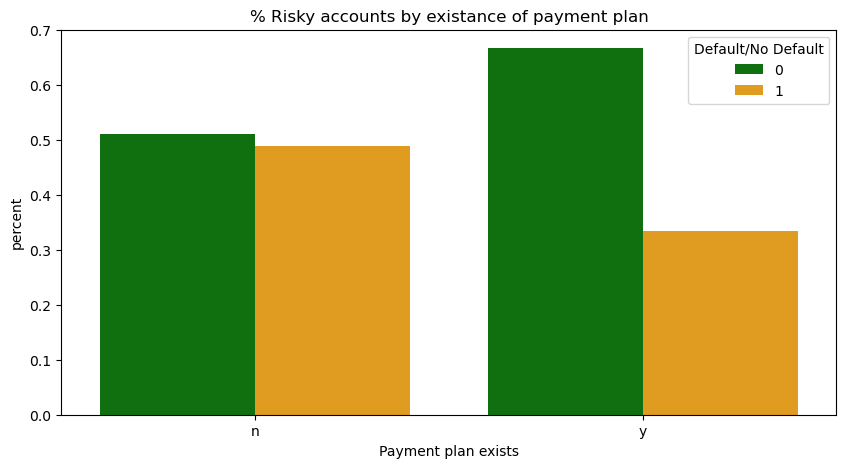

In [137]:
plt.figure(figsize = (10,5))
temp = (results[['Default/No Default','pymnt_plan']].value_counts() /results['pymnt_plan'].value_counts()).reset_index(name = 'percent')
temp['Default/No Default'] = temp['Default/No Default'].astype('str')
plt.xticks(rotation = 0)
palette = {'1': 'orange', '0': 'green'}
sns.barplot(data = temp, x = 'pymnt_plan', y = 'percent', hue = 'Default/No Default', palette = palette)

plt.title('% Risky accounts by existance of payment plan')
plt.xlabel('Payment plan exists')
plt.show()
#['Default/No Default']

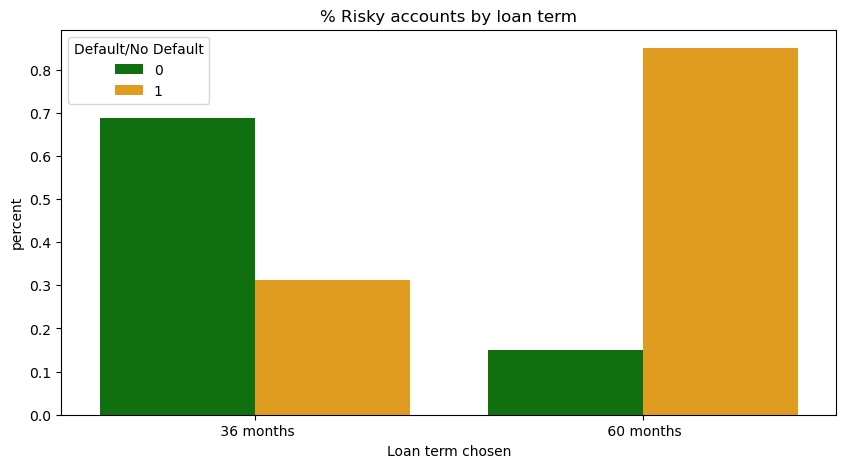

In [138]:
plt.figure(figsize = (10,5))
temp = (results[['Default/No Default','term']].value_counts() /results['term'].value_counts()).reset_index(name = 'percent')
temp['Default/No Default'] = temp['Default/No Default'].astype('str')
plt.xticks(rotation = 0)
palette = {'1': 'orange', '0': 'green'}
sns.barplot(data = temp, x = 'term', y = 'percent', hue = 'Default/No Default', palette = palette)

plt.title('% Risky accounts by loan term')
plt.xlabel('Loan term chosen')
plt.show()
#['Default/No Default']

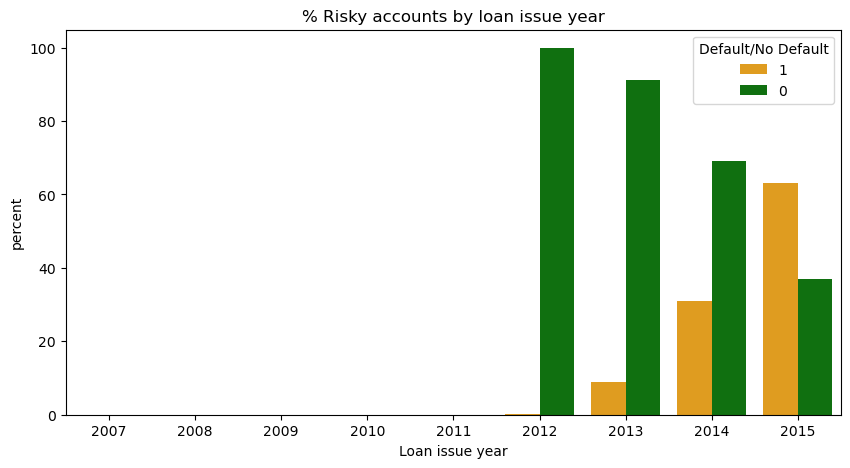

In [145]:
plt.figure(figsize = (10,5))
temp = (results[['Default/No Default','issue_year']].value_counts() *100/results['issue_year'].value_counts()).reset_index(name = 'percent')
temp['Default/No Default'] = temp['Default/No Default'].astype('str')
plt.xticks(rotation = 0)
palette = {'1': 'orange', '0': 'green'}
sns.barplot(data = temp, x = 'issue_year', y = 'percent', hue = 'Default/No Default', palette = palette)

plt.title('% Risky accounts by loan issue year')
plt.xlabel('Loan issue year')
plt.show()
#['Default/No Default']

### Observations:
- More risky loans issued recently
- Education and wedding related loans at the least risk of default
- 36-month term loan lest riskier than 60-month term loans
- Memebrs with payment plna less likely to default compared to the ones without
- Joint loans are more likely to default compared to individual ones
- States of Maine, Nebraska and North Dakota have a higher proportion of risky loans compared to the rest
- Majority of the issued loans are risky

### Results: Member ID's of borrowers classified by their probability of default

Currently healthy accounts

In [140]:
pd.Series(results[results['Default_probability']<0.125]['member_id'], name = "Currently ideal accounts")

0         12000897
1         12011200
2          1319523
3         12011167
4         11971241
            ...   
626334    39023153
626336    37777829
626337    39042282
626338    38932858
626339    39102635
Name: Currently ideal accounts, Length: 320168, dtype: int64

Moderately risky accounts

In [142]:
pd.Series(results[results['Default_probability'].between(0.125,0.3)]['member_id'], name = "Moderately risky accounts")

389       11960143
536       11949819
581       11969733
607       11226865
609       12008546
            ...   
625414    40445072
625468    40525071
625532    40444806
626140    40573474
626178    39526086
Name: Moderately risky accounts, Length: 9867, dtype: int64

Risky accounts

In [143]:
pd.Series(results[results['Default_probability'].between(0.301,0.5)]['member_id'], name = "Risky accounts")

9         12001069
16        11941167
17        11971186
25        11951196
27        11709434
            ...   
626335    38961532
626340    39152692
626341    38982739
626342    39222577
626343    38982659
Name: Risky accounts, Length: 83907, dtype: int64

Riskiest accounts - Very high chance of default

In [144]:
pd.Series(results[results['Default_probability']>0.5]['member_id'], name = "Extremely accounts")

46        11961164
250       10869650
287       11728749
363       11920231
480       11998188
            ...   
626316    36967090
626317    39773999
626325    39182359
626326    38468842
626329    39093260
Name: Riskiest accounts, Length: 212402, dtype: int64